In [12]:
import pandas as pd
import os

In [13]:
# Construct the file path using os.path
file_path = os.path.join('..','assets', 'MTA_Daily_Ridership_Data__Beginning_2020_20241001.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())



         Date  Subways: Total Estimated Ridership  \
0  03/01/2020                             2212965   
1  03/02/2020                             5329915   
2  03/03/2020                             5481103   
3  03/04/2020                             5498809   
4  03/05/2020                             5496453   

   Subways: % of Comparable Pre-Pandemic Day  \
0                                         97   
1                                         96   
2                                         98   
3                                         99   
4                                         99   

   Buses: Total Estimated Ridership  Buses: % of Comparable Pre-Pandemic Day  \
0                            984908                                       99   
1                           2209066                                       99   
2                           2228608                                       99   
3                           2177165                                     

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_46252/3210517096.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


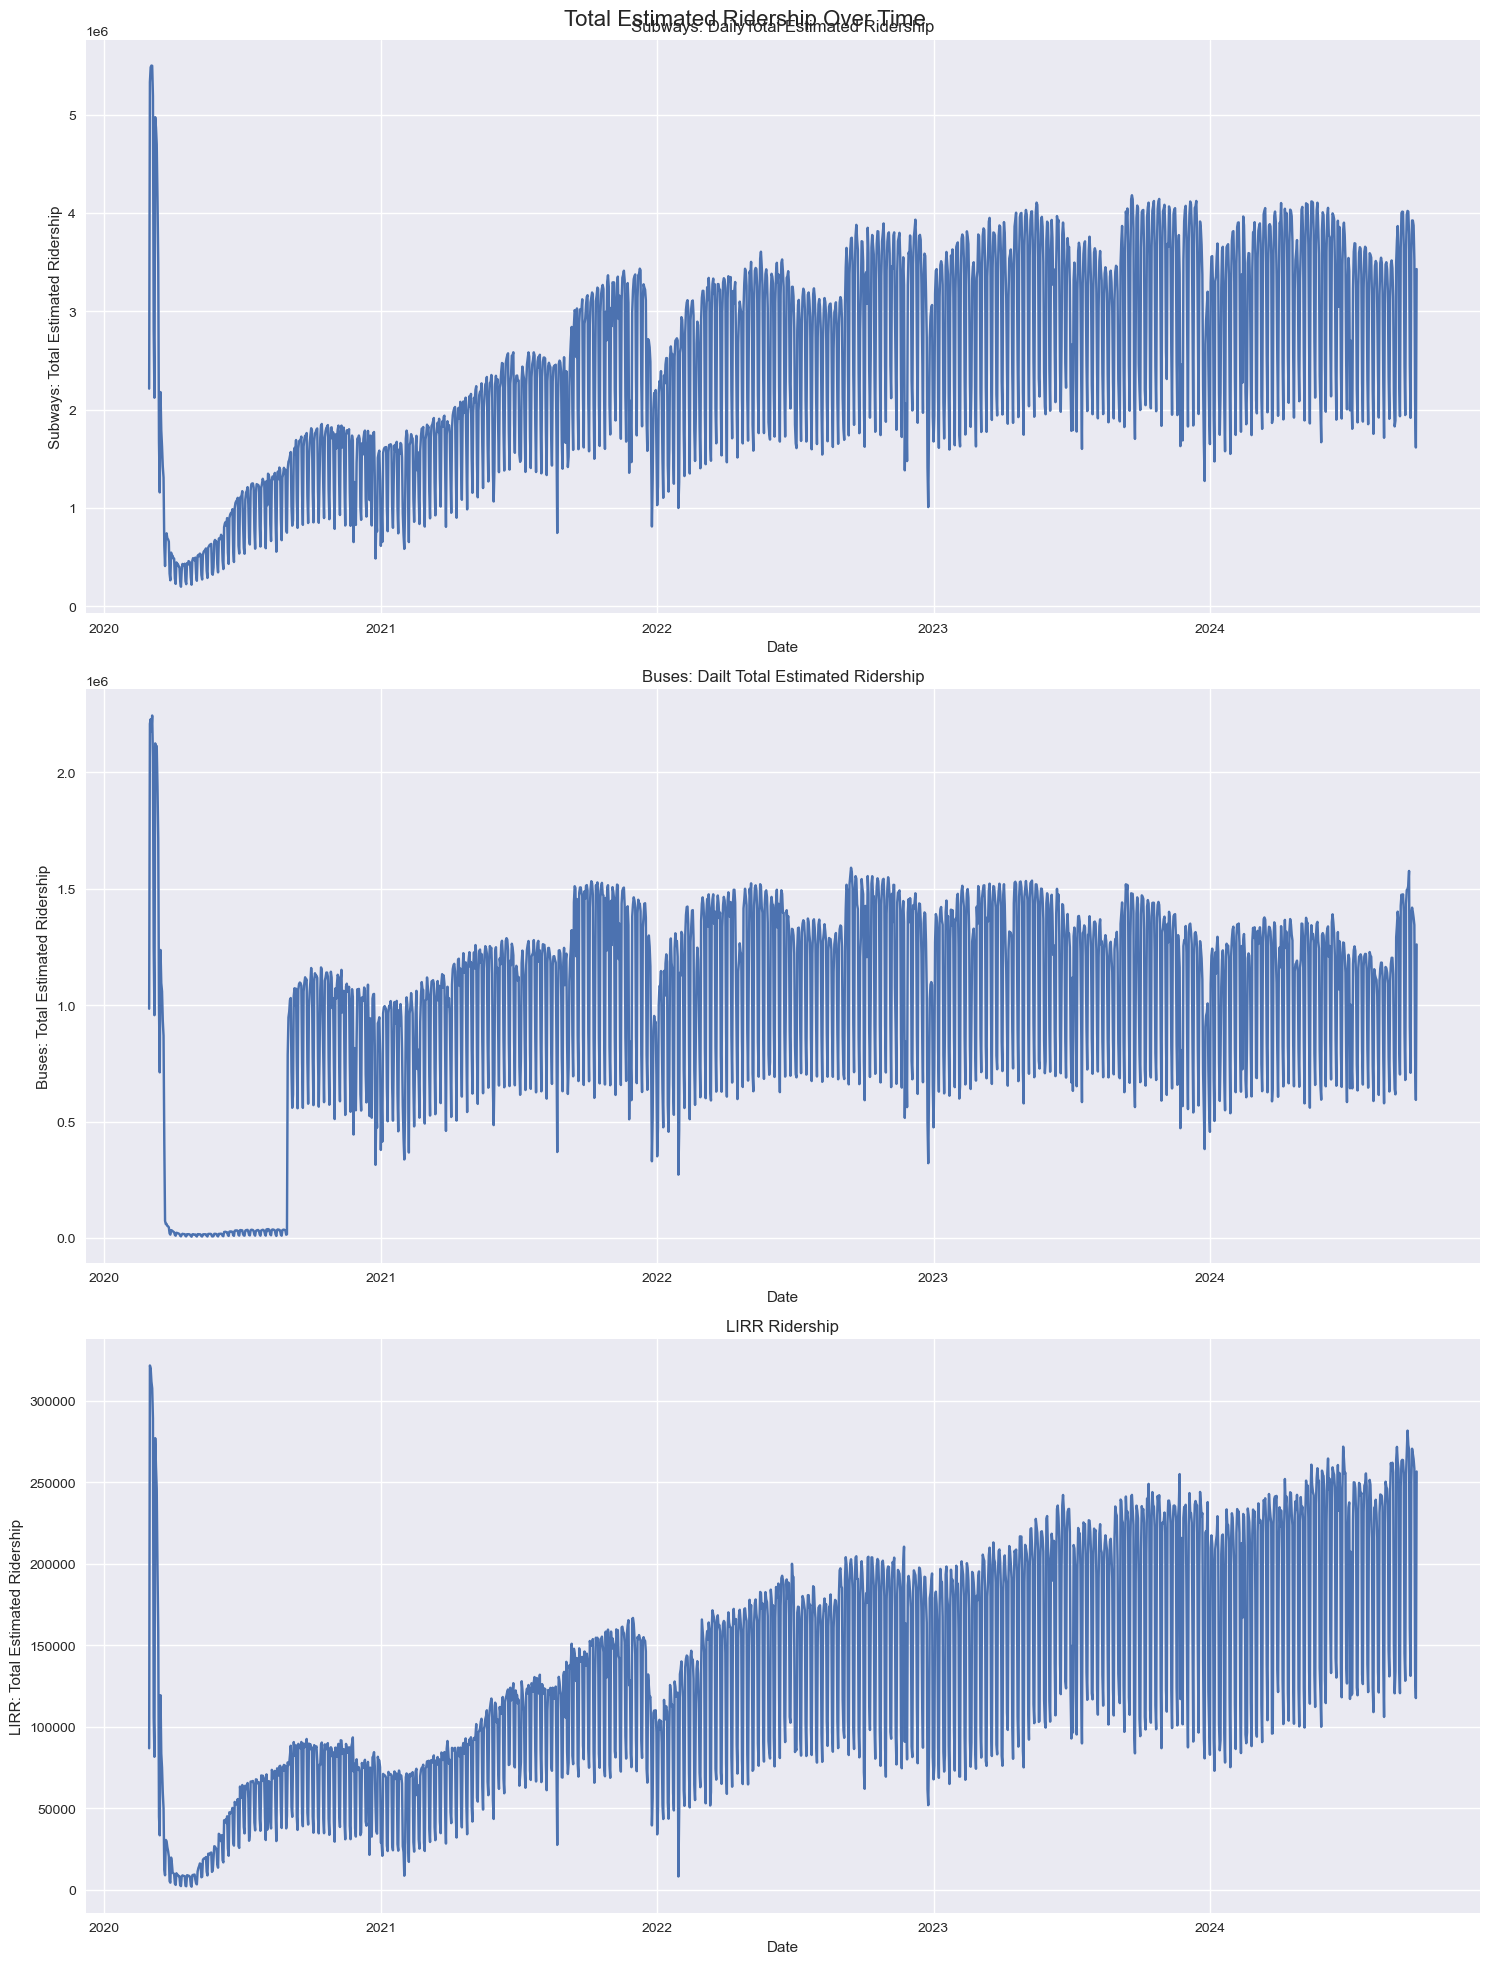

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('Total Estimated Ridership Over Time', fontsize=16)

# Plot for Bus
sns.lineplot(x='Date', y='Subways: Total Estimated Ridership', data=df, ax=axs[0])
axs[0].set_title('Subways: DailyTotal Estimated Ridership')
axs[0].set_xlabel('Date')

# Plot for Subway
sns.lineplot(x='Date', y='Buses: Total Estimated Ridership', data=df, ax=axs[1])
axs[1].set_title('Buses: Dailt Total Estimated Ridership')
axs[1].set_xlabel('Date')

# Plot for LIRR
sns.lineplot(x='Date', y='LIRR: Total Estimated Ridership', data=df, ax=axs[2])
axs[2].set_title('LIRR Ridership')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_46252/941480095.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


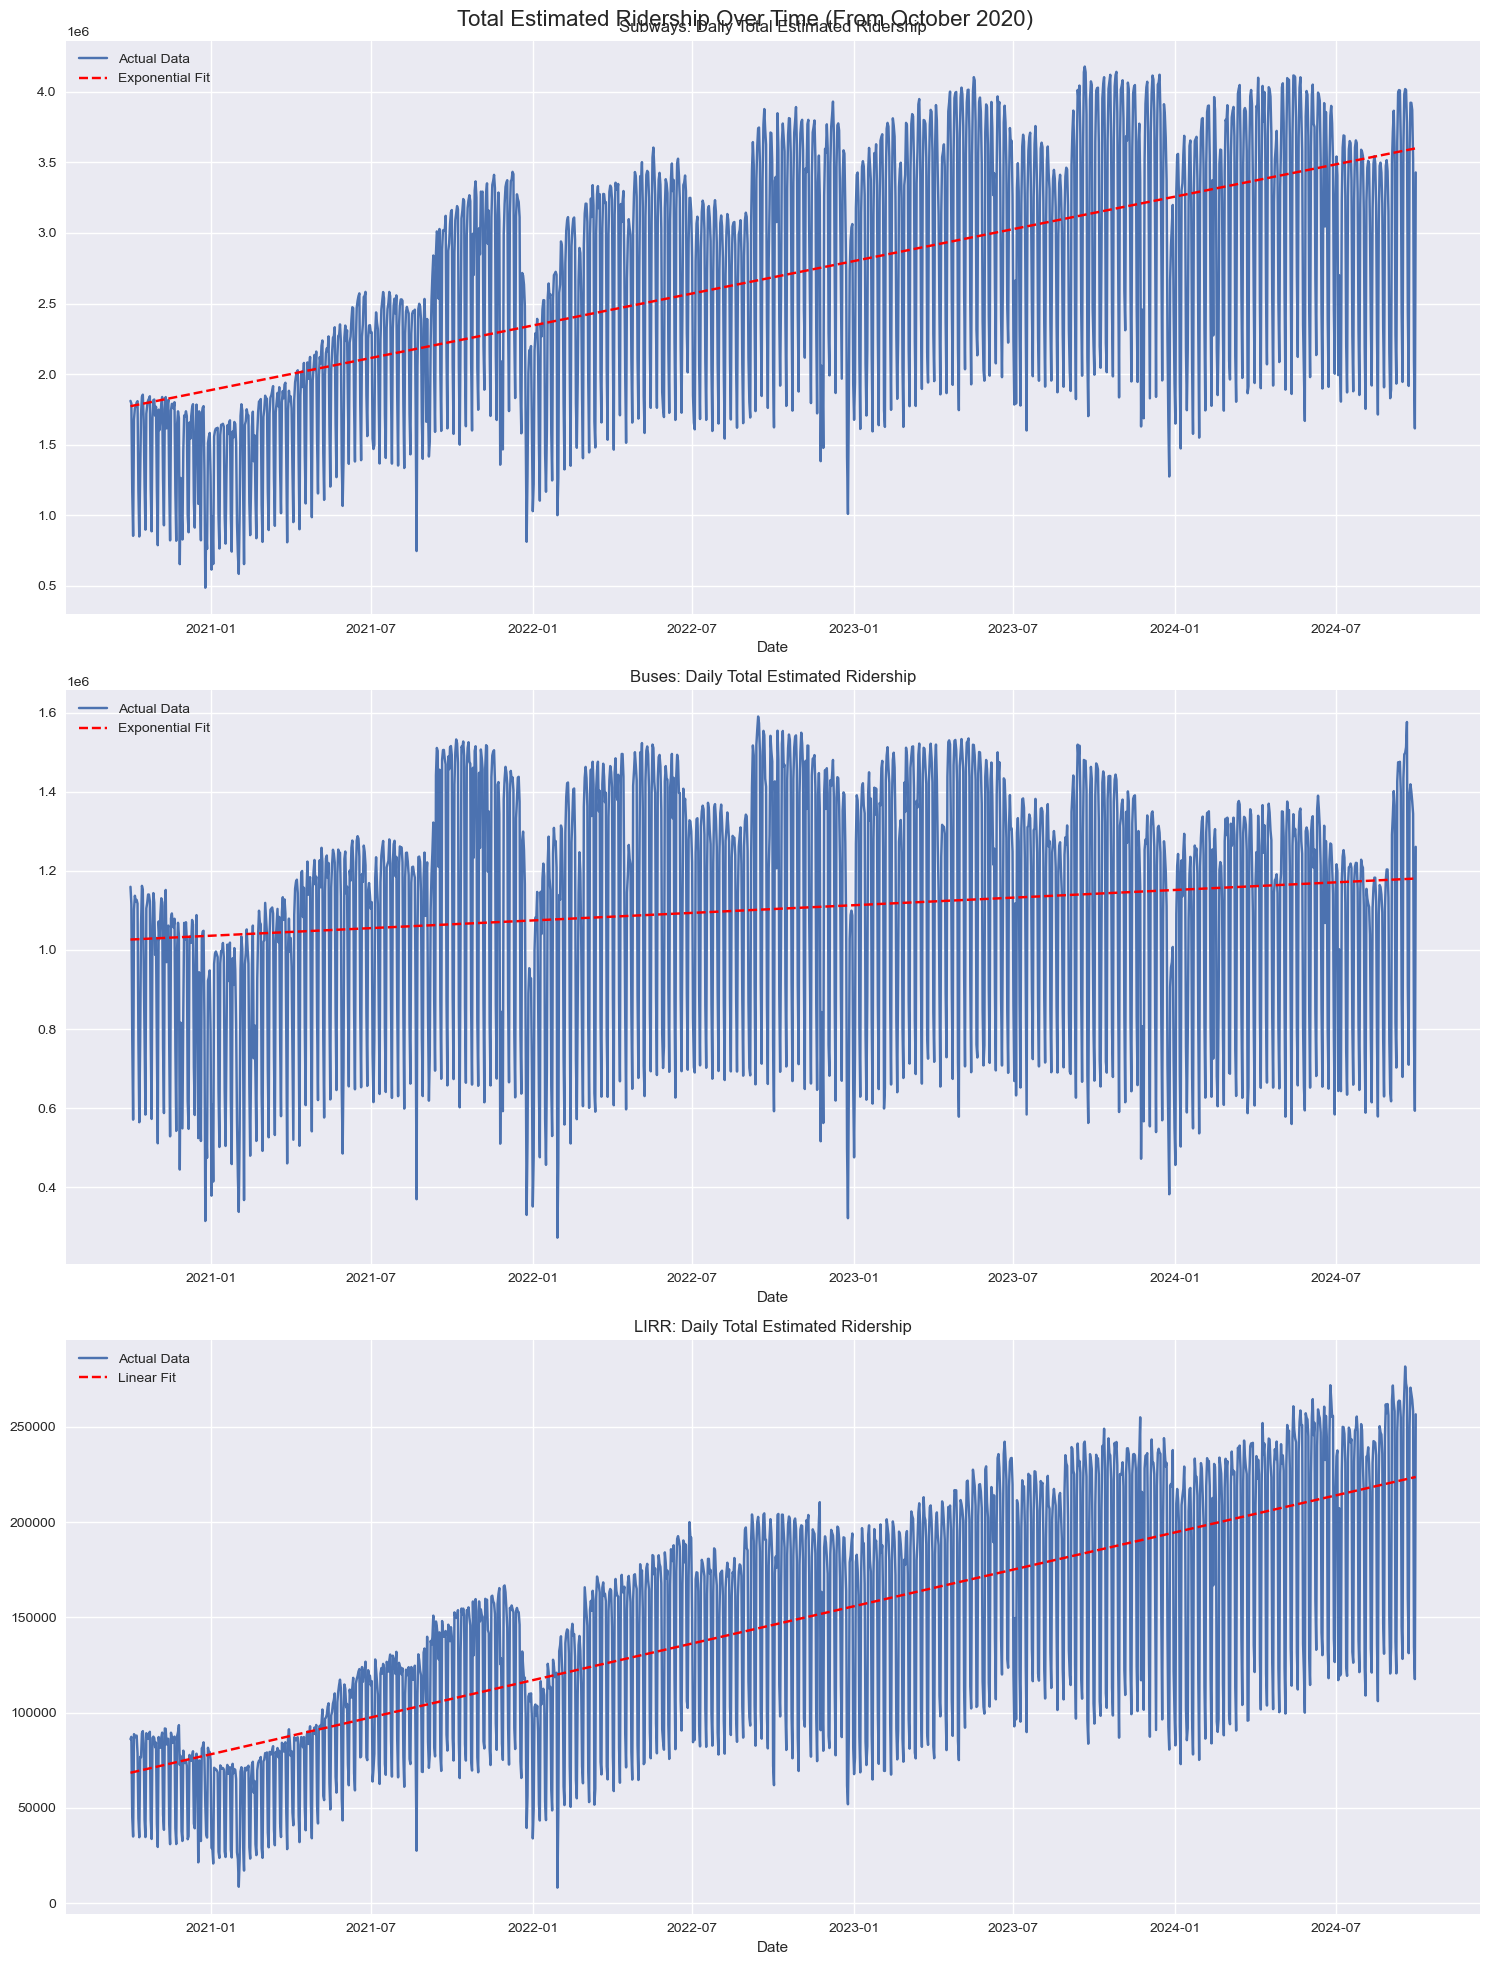

Subway parameters: [ 1.07012076e+10  1.16992164e-07 -1.06994355e+10]
Bus parameters: [ 9.67783789e+08  1.09216344e-07 -9.66757391e+08]
LIRR parameters (slope, intercept): 106.30589256158503 68447.27200978283


In [15]:
# Trim data to start from October 2020
start_date = pd.to_datetime('2020-10-01')
# start_date = pd.to_datetime('2022-02-01')
# start_date = pd.to_datetime('2023-01-01')
df_trimmed = df[df['Date'] >= start_date]

import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

# Define the exponential function
def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# Set up the plot style
plt.style.use('seaborn')
fig, axs = plt.subplots(3, 1, figsize=(15, 20))
fig.suptitle('Total Estimated Ridership Over Time (From October 2020)', fontsize=16)

# Function to fit and plot exponential model
def fit_and_plot_exponential(ax, x, y, label):
    # Fit exponential model
    popt, _ = curve_fit(exponential, x, y, p0=[1, 0.001, 1], maxfev=10000)
    
    # Plot original data
    ax.plot(df_trimmed['Date'], y, label='Actual Data')
    
    # Plot fitted exponential model
    ax.plot(df_trimmed['Date'], exponential(x, *popt), 'r--', label='Exponential Fit')
    
    ax.set_title(f'{label}: Daily Total Estimated Ridership')
    ax.set_xlabel('Date')
    ax.legend()

    return popt

# Function to fit and plot linear regression
def fit_and_plot_linear(ax, x, y, label):
    # Fit linear regression
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    
    # Plot original data
    ax.plot(df_trimmed['Date'], y, label='Actual Data')
    
    # Plot fitted linear model
    ax.plot(df_trimmed['Date'], model.predict(x.reshape(-1, 1)), 'r--', label='Linear Fit')
    
    ax.set_title(f'{label}: Daily Total Estimated Ridership')
    ax.set_xlabel('Date')
    ax.legend()

    return model.coef_[0], model.intercept_, model

# Convert dates to numbers for fitting
x = (df_trimmed['Date'] - df_trimmed['Date'].min()).dt.days.values

# Plot for Subways
y_subway = df_trimmed['Subways: Total Estimated Ridership'].values
popt_subway = fit_and_plot_exponential(axs[0], x, y_subway, 'Subways')

# Plot for Buses
y_buses = df_trimmed['Buses: Total Estimated Ridership'].values
popt_buses = fit_and_plot_exponential(axs[1], x, y_buses, 'Buses')

# Plot for LIRR (using linear regression)
y_lirr = df_trimmed['LIRR: Total Estimated Ridership'].values
popt_lirr, intercept_lirr, model_lirr = fit_and_plot_linear(axs[2], x, y_lirr, 'LIRR')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the optimized parameters
print("Subway parameters:", popt_subway)
print("Bus parameters:", popt_buses)
print("LIRR parameters (slope, intercept):", popt_lirr, intercept_lirr)


/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_46252/577207722.py:17: RuntimeWarning: divide by zero encountered in divide
  frequencies_days = 1 / frequencies
/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_46252/577207722.py:17: RuntimeWarning: divide by zero encountered in divide
  frequencies_days = 1 / frequencies


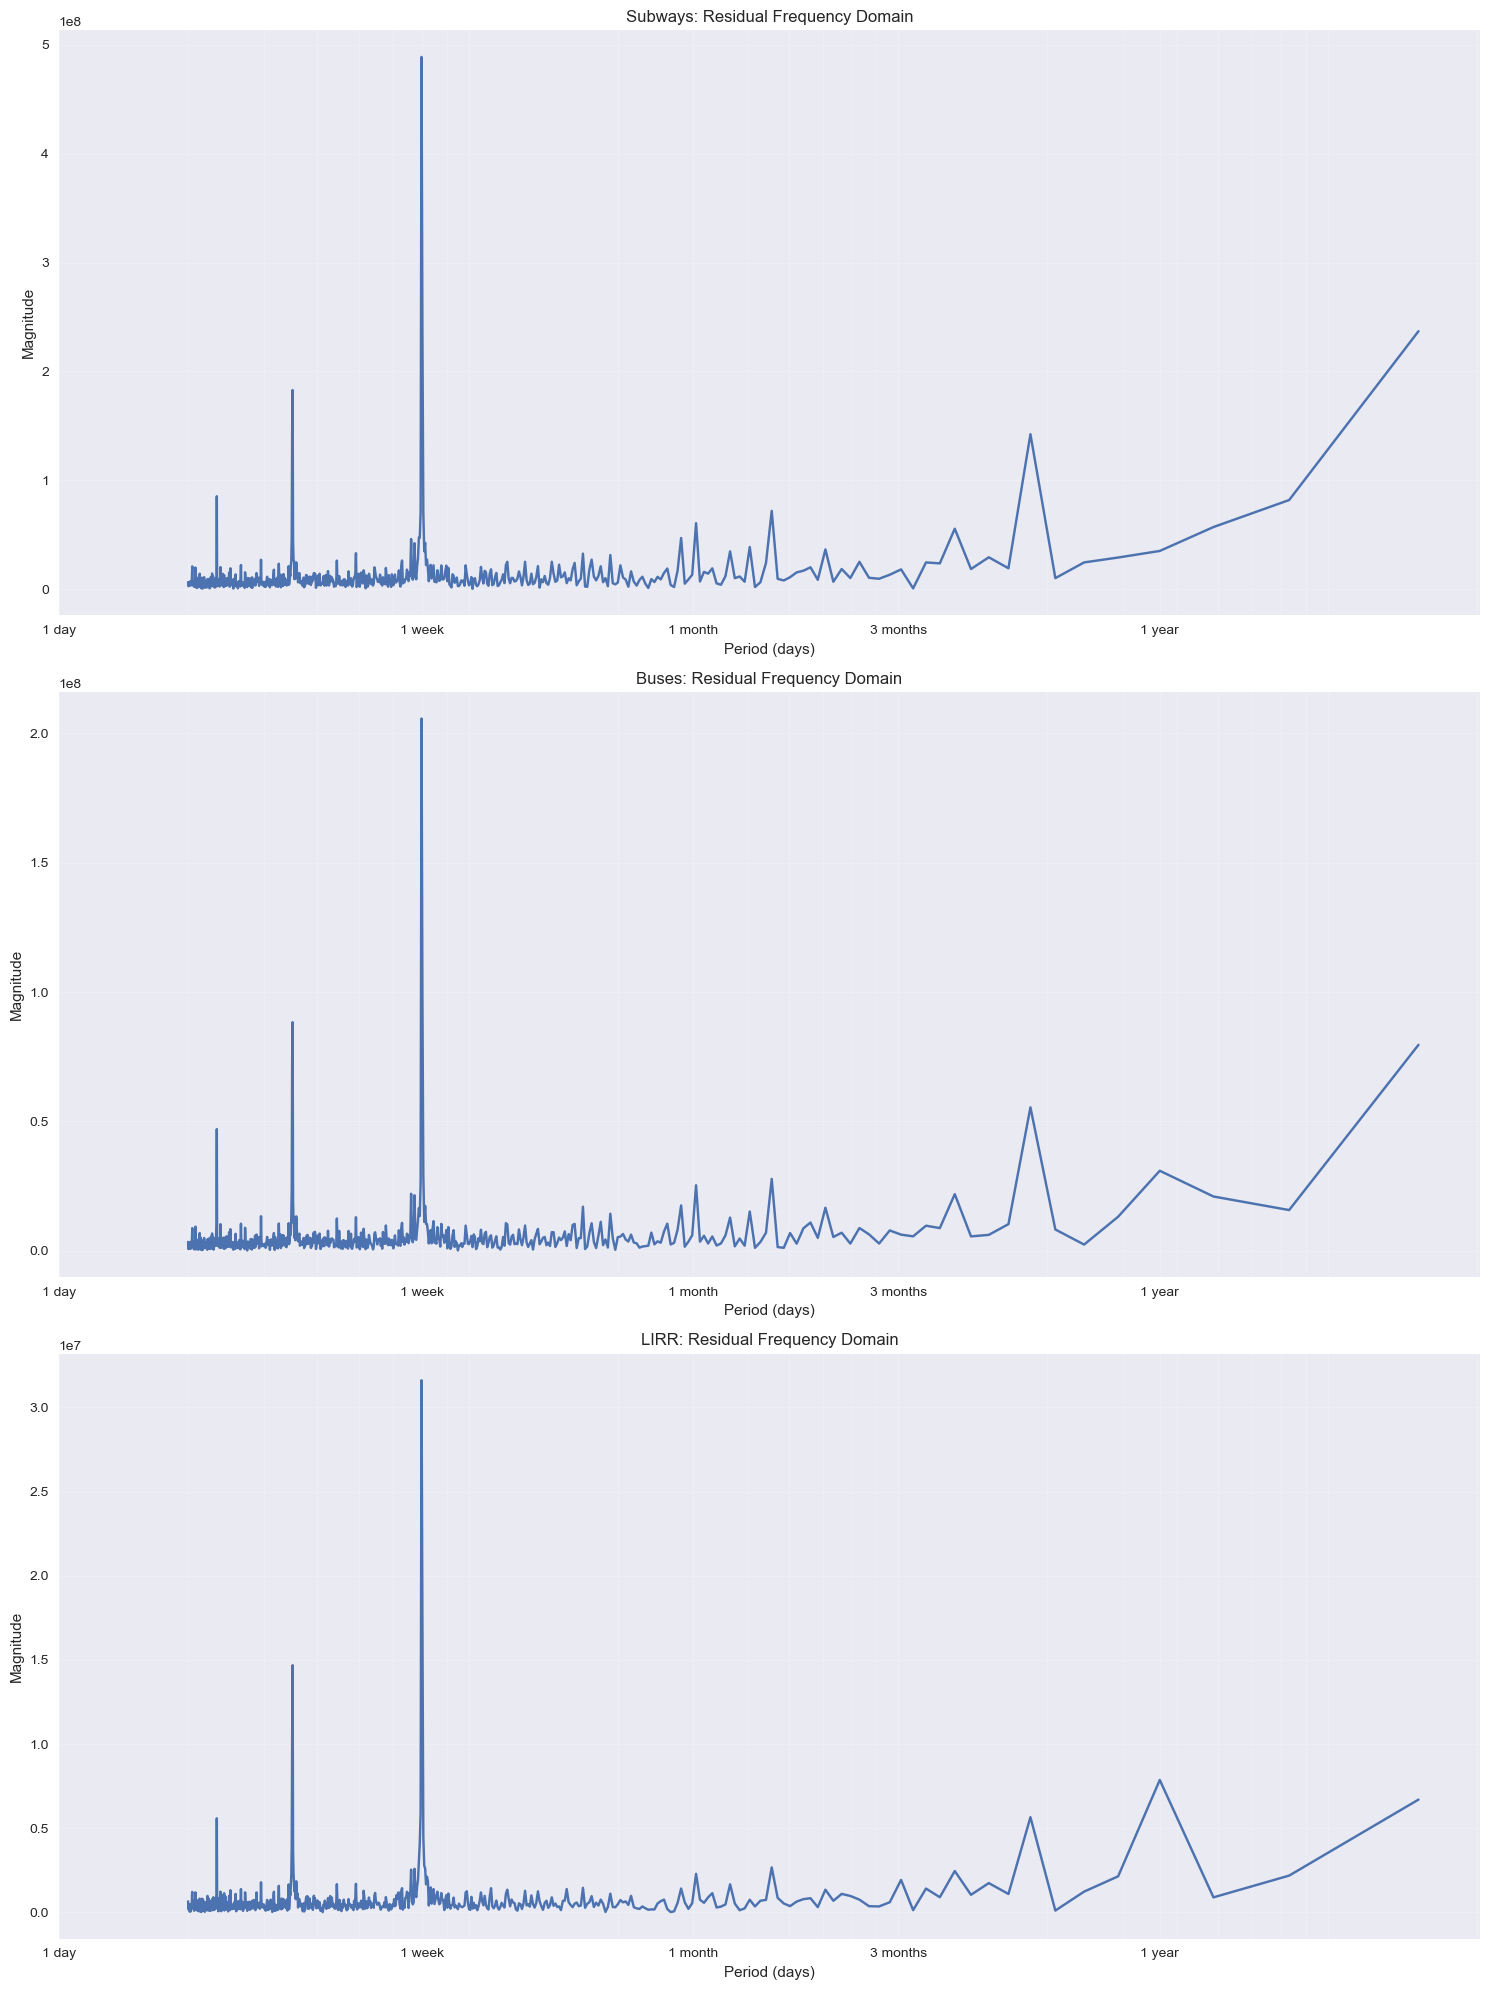

In [16]:
# Function to perform FFT and plot frequency domain of residuals
def plot_residual_frequency_domain(ax, x, y, model_func, popt, label, sampling_rate=1):
    # Calculate residuals
    if model_func == exponential:
        residuals = y - model_func(x, *popt)
    else:  # Linear model
        residuals = y - model_func.predict(x.reshape(-1, 1))
    
    # Perform FFT on residuals
    fft_result = np.fft.fft(residuals)
    frequencies = np.fft.fftfreq(len(residuals), d=1/sampling_rate)
    
    # Calculate magnitude spectrum
    magnitude_spectrum = np.abs(fft_result)
    
    # Convert frequencies to days
    frequencies_days = 1 / frequencies
    
    # Plot only the positive frequencies
    positive_freq_mask = frequencies > 0
    ax.plot(frequencies_days[positive_freq_mask], magnitude_spectrum[positive_freq_mask])
    
    ax.set_title(f'{label}: Residual Frequency Domain')
    ax.set_xlabel('Period (days)')
    ax.set_ylabel('Magnitude')
    ax.set_xscale('log')  # Use log scale for better visualization
    
    # Add more resolution to x-axis
    ax.set_xticks([1, 7, 30, 90, 365])  # 1 day, 1 week, 1 month, 3 months, 1 year
    ax.set_xticklabels(['1 day', '1 week', '1 month', '3 months', '1 year'])
    ax.grid(True, which="both", ls="-", alpha=0.2)

# Create a new figure for residual frequency domain plots
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Plot residual frequency domain for Subways
plot_residual_frequency_domain(axs[0], x, y_subway, exponential, popt_subway, 'Subways')

# Plot residual frequency domain for Buses
plot_residual_frequency_domain(axs[1], x, y_buses, exponential, popt_buses, 'Buses')

# Plot residual frequency domain for LIRR
plot_residual_frequency_domain(axs[2], x, y_lirr, model_lirr, None, 'LIRR')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


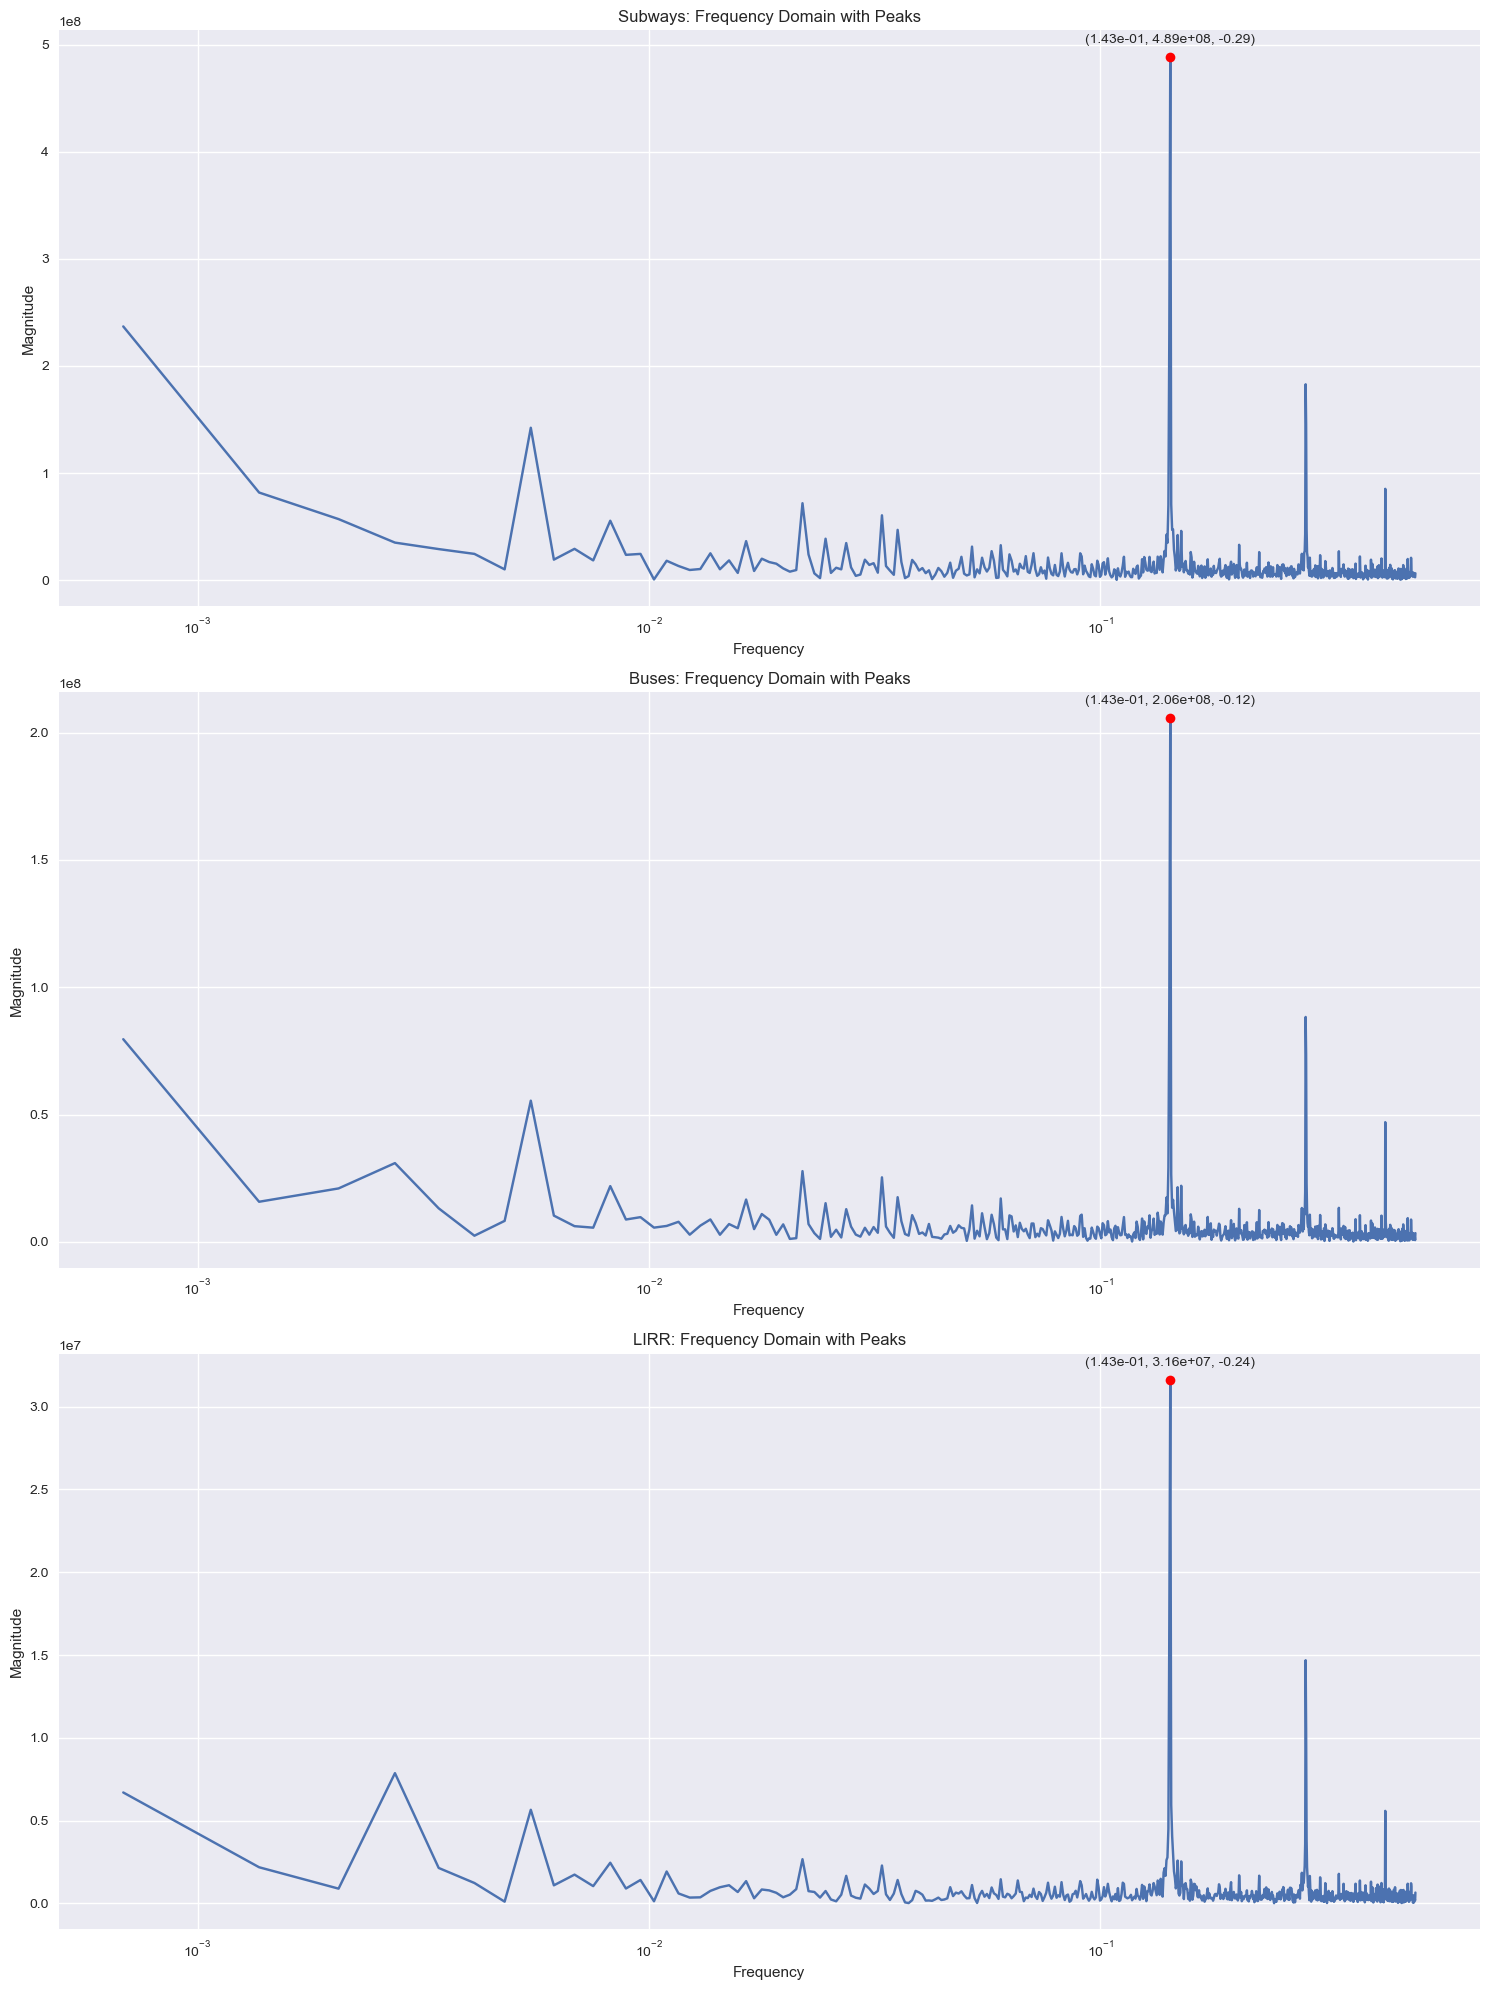

Subway Peaks (Frequency, Magnitude, Phase): [(0.1430527036276523, 488930792.9951341, -0.2864676902580491)]
Buses Peaks (Frequency, Magnitude, Phase): [(0.1430527036276523, 205646507.83252683, -0.1208041498030752)]
LIRR Peaks (Frequency, Magnitude, Phase): [(0.1430527036276523, 31616152.03045729, -0.23929062848617622)]


In [17]:
from scipy import signal
import numpy as np

# Function to find peaks in the frequency domain
def find_peaks(frequencies, magnitudes, phases, n_peaks, min_freq=1e-2):
    # Filter frequencies above the minimum threshold
    mask = frequencies > min_freq
    filtered_freq = frequencies[mask]
    filtered_mag = magnitudes[mask]
    filtered_phase = phases[mask]
    
    # Find peaks
    peaks, _ = signal.find_peaks(filtered_mag)
    
    # Sort peaks by magnitude and get the top n_peaks
    sorted_peaks = sorted(peaks, key=lambda i: filtered_mag[i], reverse=True)[:n_peaks]
    
    return [(filtered_freq[i], filtered_mag[i], filtered_phase[i]) for i in sorted_peaks]

# Function to plot frequency domain with peak finding
def plot_frequency_domain_with_peaks(ax, residuals, label, n_peaks, sampling_rate=1):
    # Perform FFT
    fft_result = np.fft.fft(residuals)
    
    frequencies = np.fft.fftfreq(len(residuals), d=1/sampling_rate)
    
    # Calculate magnitude spectrum and phase
    magnitude_spectrum = np.abs(fft_result)
    phase_spectrum = np.angle(fft_result)
    
    # Plot only the positive frequencies
    positive_freq_mask = frequencies > 0
    ax.plot(frequencies[positive_freq_mask], magnitude_spectrum[positive_freq_mask])
    
    # Find and plot peaks
    peaks = find_peaks(frequencies[positive_freq_mask], magnitude_spectrum[positive_freq_mask], phase_spectrum[positive_freq_mask], n_peaks)
    for freq, mag, phase in peaks:
        ax.plot(freq, mag, 'ro')
        ax.annotate(f'({freq:.2e}, {mag:.2e}, {phase:.2f})', (freq, mag), textcoords="offset points", xytext=(0,10), ha='center')
    
    ax.set_title(f'{label}: Frequency Domain with Peaks')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Magnitude')
    ax.set_xscale('log')
    
    return peaks

# Create a new figure for frequency domain plots with peak finding
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Calculate residuals
residuals_subway = y_subway - exponential(x, *popt_subway)
residuals_buses = y_buses - exponential(x, *popt_buses)
residuals_lirr = y_lirr - model_lirr.predict(x.reshape(-1, 1))

# Plot frequency domain with peaks for Subways
peaks_subway = plot_frequency_domain_with_peaks(axs[0], residuals_subway, 'Subways', 1)

# Plot frequency domain with peaks for Buses
peaks_buses = plot_frequency_domain_with_peaks(axs[1], residuals_buses, 'Buses', 1)

# Plot frequency domain with peaks for LIRR
peaks_lirr = plot_frequency_domain_with_peaks(axs[2], residuals_lirr, 'LIRR', 1)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the peaks information
print("Subway Peaks (Frequency, Magnitude, Phase):", peaks_subway)
print("Buses Peaks (Frequency, Magnitude, Phase):", peaks_buses)
print("LIRR Peaks (Frequency, Magnitude, Phase):", peaks_lirr)


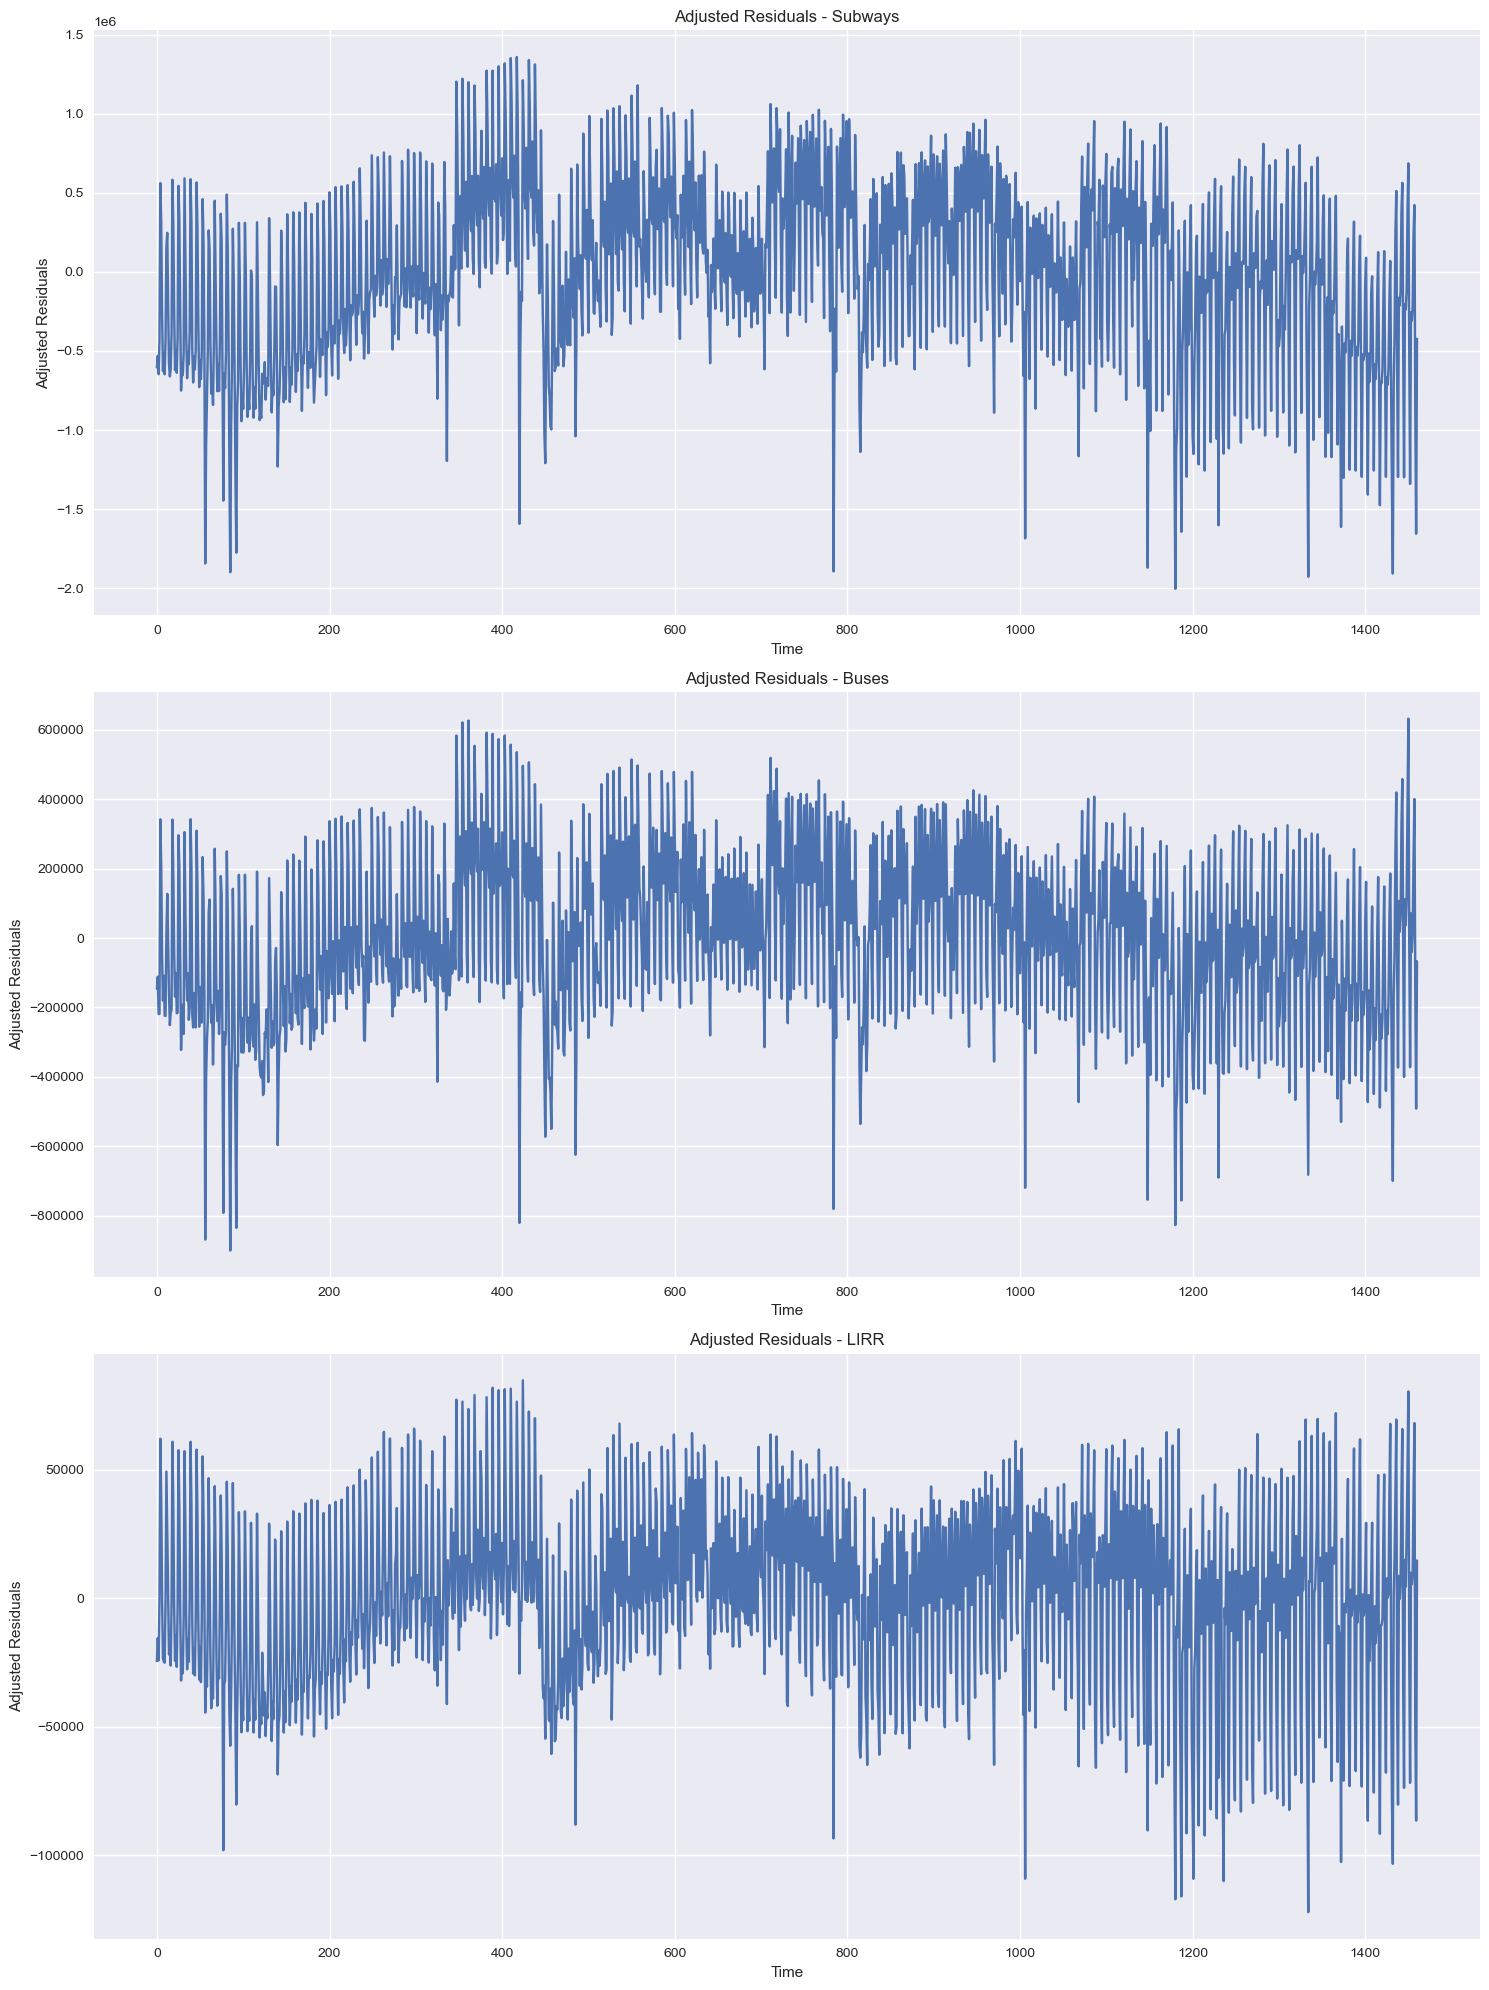

Subway Adjusted Residuals - Mean: 5.846180015755467 Std: 549617.9924368834
Buses Adjusted Residuals - Mean: 10.425866492829508 Std: 233026.73742797744
LIRR Adjusted Residuals - Mean: 1.0199288975939532e-11 Std: 34264.02475358984


In [18]:
def seasonality(x, frequency, fft_magnitude, phase, N):
    amplitude = (2 * fft_magnitude) / N
    return amplitude * np.cos(2 * np.pi * frequency * x + phase)

# Function to subtract seasonalities from residuals
def subtract_seasonalities(residuals, peaks):
    adjusted_residuals = residuals.copy()
    for freq, mag, phase in peaks:
        adjusted_residuals -= seasonality(x, freq, mag, phase, len(residuals))
    return adjusted_residuals

# Subtract seasonalities from residuals
adjusted_residuals_subway = subtract_seasonalities(residuals_subway, peaks_subway)
adjusted_residuals_buses = subtract_seasonalities(residuals_buses, peaks_buses)
adjusted_residuals_lirr = subtract_seasonalities(residuals_lirr, peaks_lirr)

# Create a new figure for plotting adjusted residuals
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Plot adjusted residuals for Subways
axs[0].plot(x, adjusted_residuals_subway)
axs[0].set_title('Adjusted Residuals - Subways')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Adjusted Residuals')

# Plot adjusted residuals for Buses
axs[1].plot(x, adjusted_residuals_buses)
axs[1].set_title('Adjusted Residuals - Buses')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Adjusted Residuals')

# Plot adjusted residuals for LIRR
axs[2].plot(x, adjusted_residuals_lirr)
axs[2].set_title('Adjusted Residuals - LIRR')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Adjusted Residuals')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics about the adjusted residuals
print("Subway Adjusted Residuals - Mean:", np.mean(adjusted_residuals_subway), "Std:", np.std(adjusted_residuals_subway))
print("Buses Adjusted Residuals - Mean:", np.mean(adjusted_residuals_buses), "Std:", np.std(adjusted_residuals_buses))
print("LIRR Adjusted Residuals - Mean:", np.mean(adjusted_residuals_lirr), "Std:", np.std(adjusted_residuals_lirr))


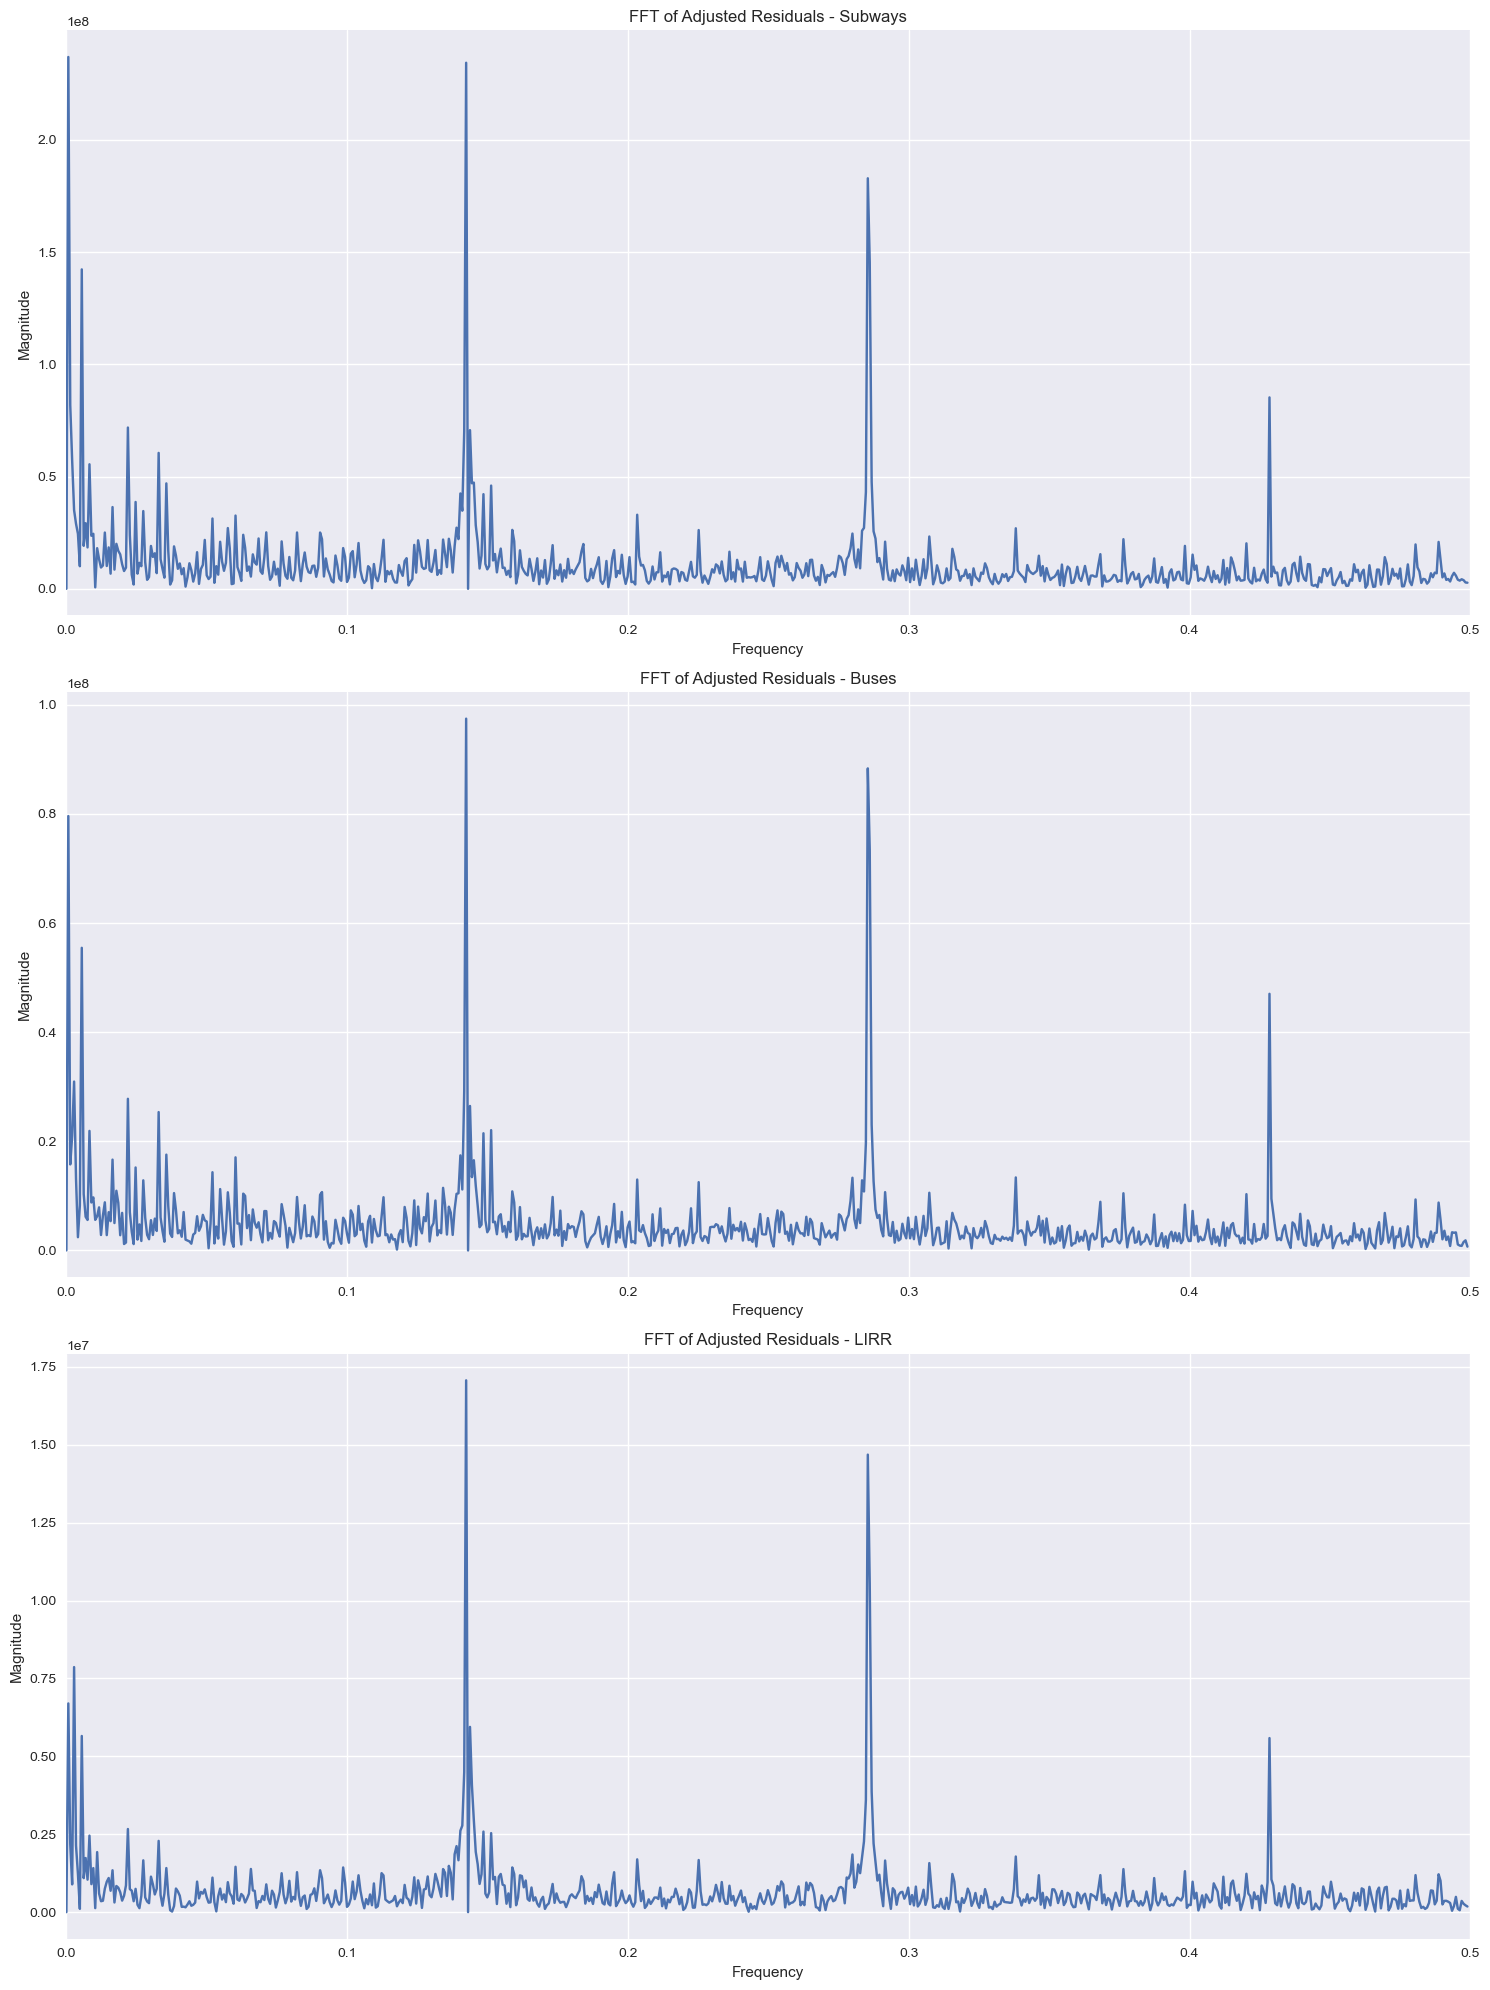

Max FFT magnitude (Subways): 236929195.9394097
Max FFT magnitude (Buses): 97446851.9981006
Max FFT magnitude (LIRR): 17071129.656500883


In [19]:
# Calculate FFT for adjusted residuals
fft_subway = np.fft.fft(adjusted_residuals_subway)
fft_buses = np.fft.fft(adjusted_residuals_buses)
fft_lirr = np.fft.fft(adjusted_residuals_lirr)

# Calculate frequencies
n = len(x)
freq = np.fft.fftfreq(n, d=1)

# Create a new figure for plotting FFT of adjusted residuals
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Plot FFT for Subways
axs[0].plot(freq[:n//2], np.abs(fft_subway)[:n//2])
axs[0].set_title('FFT of Adjusted Residuals - Subways')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Magnitude')
axs[0].set_xlim(0, 0.5)  # Limit x-axis to positive frequencies

# Plot FFT for Buses
axs[1].plot(freq[:n//2], np.abs(fft_buses)[:n//2])
axs[1].set_title('FFT of Adjusted Residuals - Buses')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlim(0, 0.5)  # Limit x-axis to positive frequencies

# Plot FFT for LIRR
axs[2].plot(freq[:n//2], np.abs(fft_lirr)[:n//2])
axs[2].set_title('FFT of Adjusted Residuals - LIRR')
axs[2].set_xlabel('Frequency')
axs[2].set_ylabel('Magnitude')
axs[2].set_xlim(0, 0.5)  # Limit x-axis to positive frequencies

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the maximum magnitude for each FFT (excluding DC component)
print("Max FFT magnitude (Subways):", np.max(np.abs(fft_subway[1:n//2])))
print("Max FFT magnitude (Buses):", np.max(np.abs(fft_buses[1:n//2])))
print("Max FFT magnitude (LIRR):", np.max(np.abs(fft_lirr[1:n//2])))


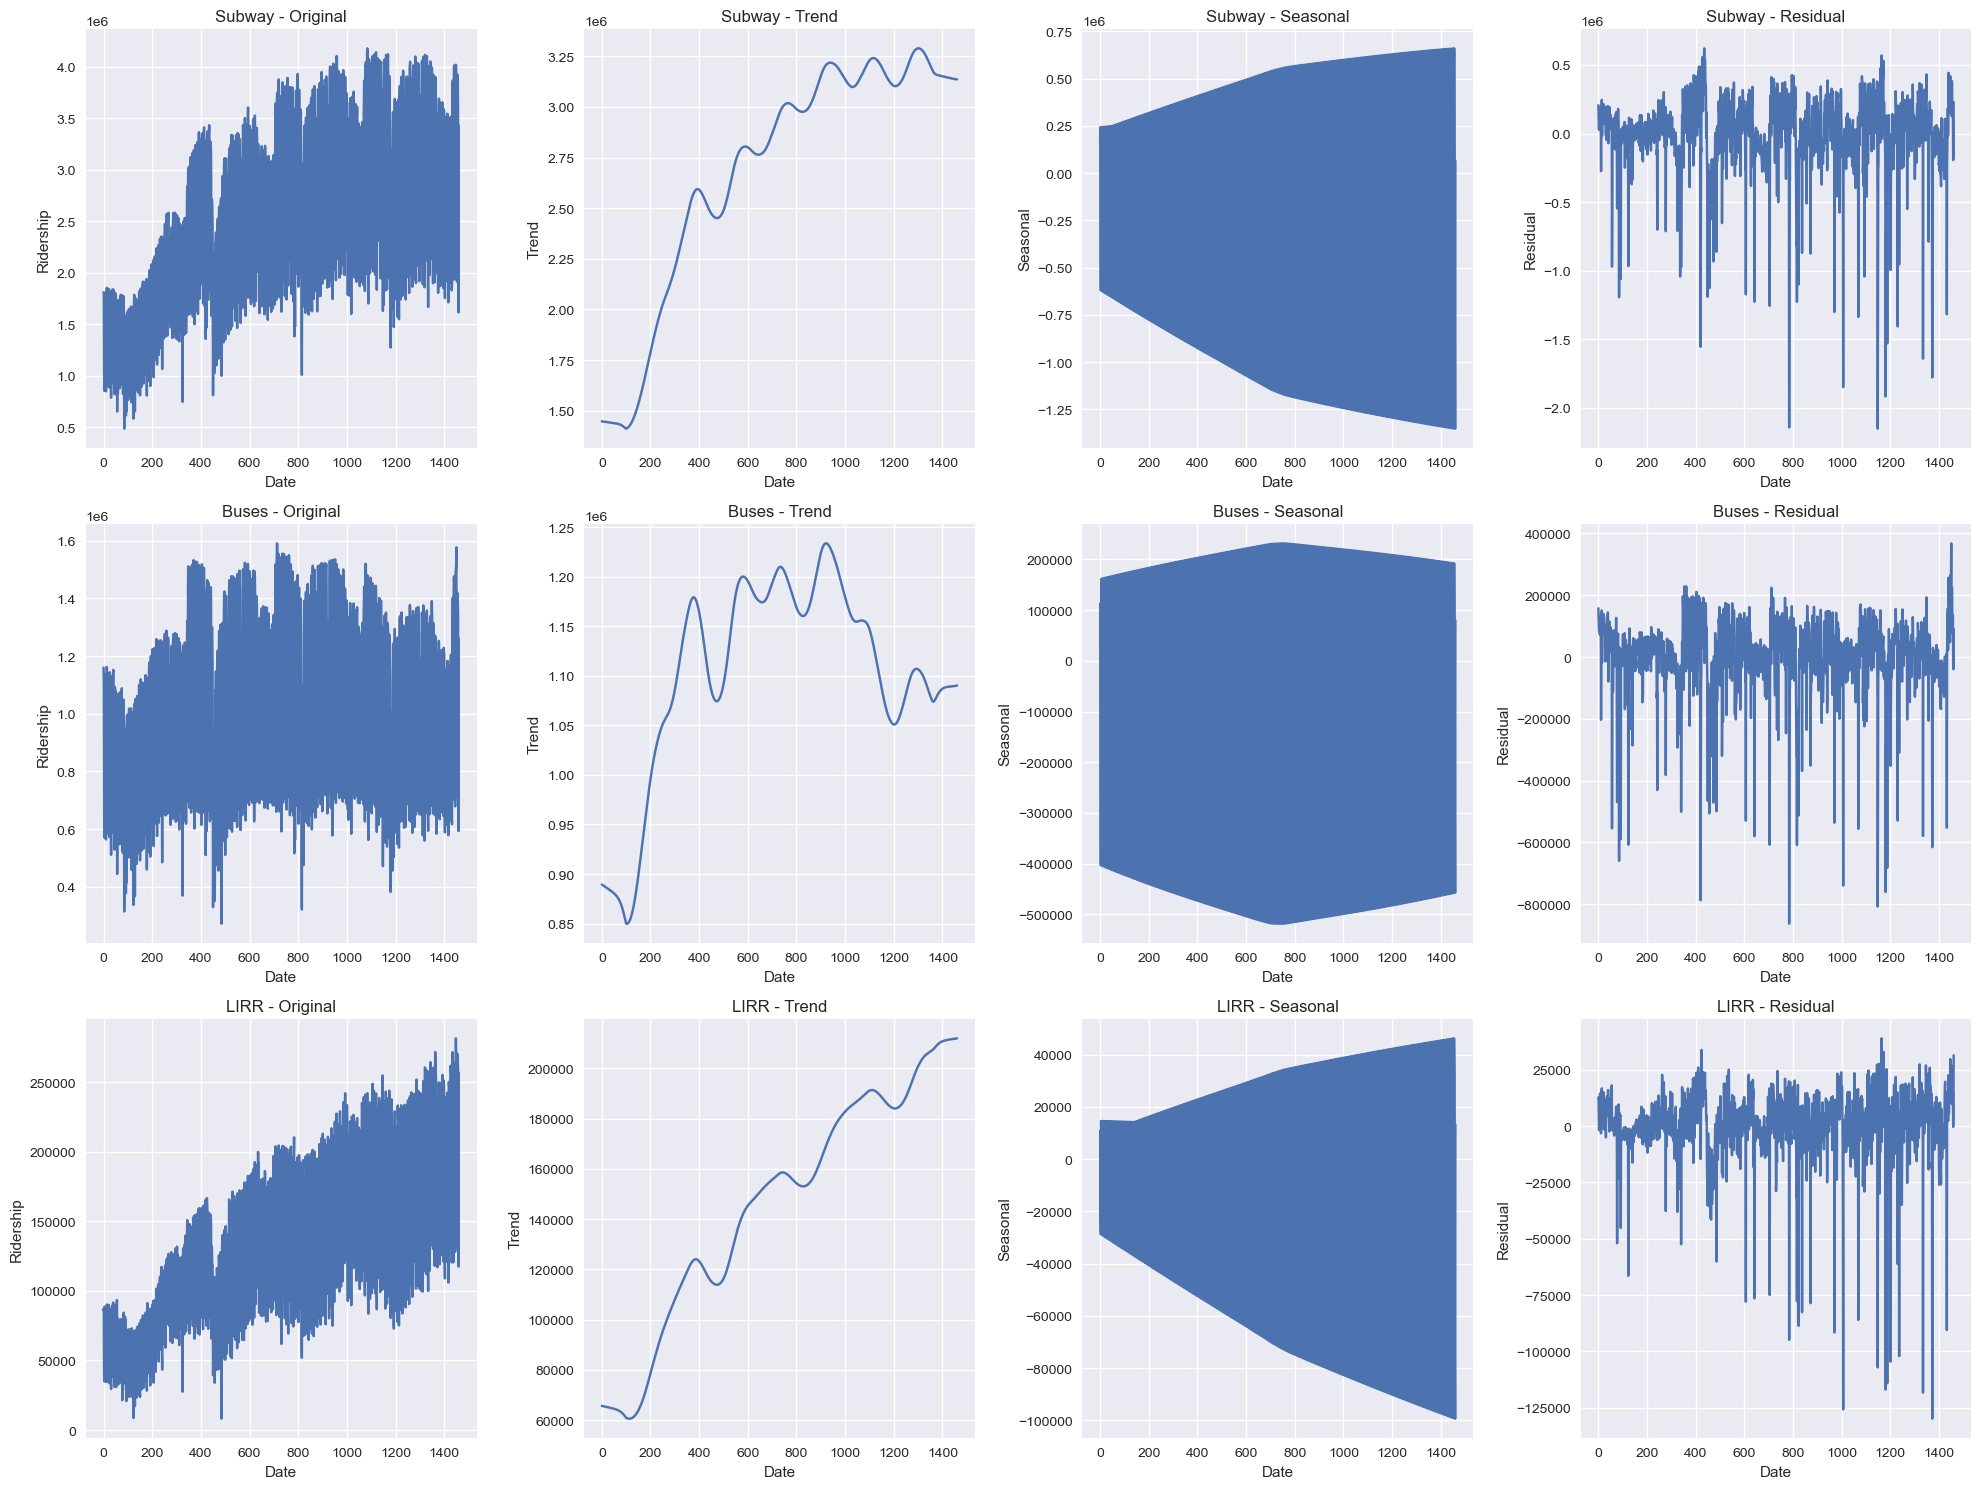


Subway STL Decomposition:
Trend strength: 0.8020
Seasonality strength: 0.8053

Buses STL Decomposition:
Trend strength: 0.3964
Seasonality strength: 0.8002

LIRR STL Decomposition:
Trend strength: 0.8909
Seasonality strength: 0.8679


In [20]:
# Perform STL decomposition for each transportation mode
from statsmodels.tsa.seasonal import STL

def perform_stl(data, period=7, trend_window=201, trend_deg=0, seasonal_window=201, seasonal_deg=1, robust=False):
    stl = STL(
        data,
        period=period,
        trend=trend_window,
        trend_deg=trend_deg,
        seasonal=seasonal_window,
        seasonal_deg=seasonal_deg,
        robust=robust
    )
    result = stl.fit()
    return result

# Create a new figure for plotting STL decomposition
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# List of transportation modes
modes = ['Subway', 'Buses', 'LIRR']
data_list = [y_subway, y_buses, y_lirr]

for i, (mode, data) in enumerate(zip(modes, data_list)):
    # Perform STL decomposition
    stl_result = perform_stl(data)
    
    # Plot original data
    axs[i, 0].plot(x, data)
    axs[i, 0].set_title(f'{mode} - Original')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Ridership')
    
    # Plot trend component
    axs[i, 1].plot(x, stl_result.trend)
    axs[i, 1].set_title(f'{mode} - Trend')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Trend')
    
    # Plot seasonal component
    axs[i, 2].plot(x, stl_result.seasonal)
    axs[i, 2].set_title(f'{mode} - Seasonal')
    axs[i, 2].set_xlabel('Date')
    axs[i, 2].set_ylabel('Seasonal')
    
    # Plot residual component
    axs[i, 3].plot(x, stl_result.resid)
    axs[i, 3].set_title(f'{mode} - Residual')
    axs[i, 3].set_xlabel('Date')
    axs[i, 3].set_ylabel('Residual')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics about the decomposition
for mode, data in zip(modes, data_list):
    stl_result = perform_stl(data)
    print(f"\n{mode} STL Decomposition:")
    print(f"Trend strength: {1 - np.var(stl_result.resid) / np.var(stl_result.trend + stl_result.resid):.4f}")
    print(f"Seasonality strength: {1 - np.var(stl_result.resid) / np.var(stl_result.seasonal + stl_result.resid):.4f}")


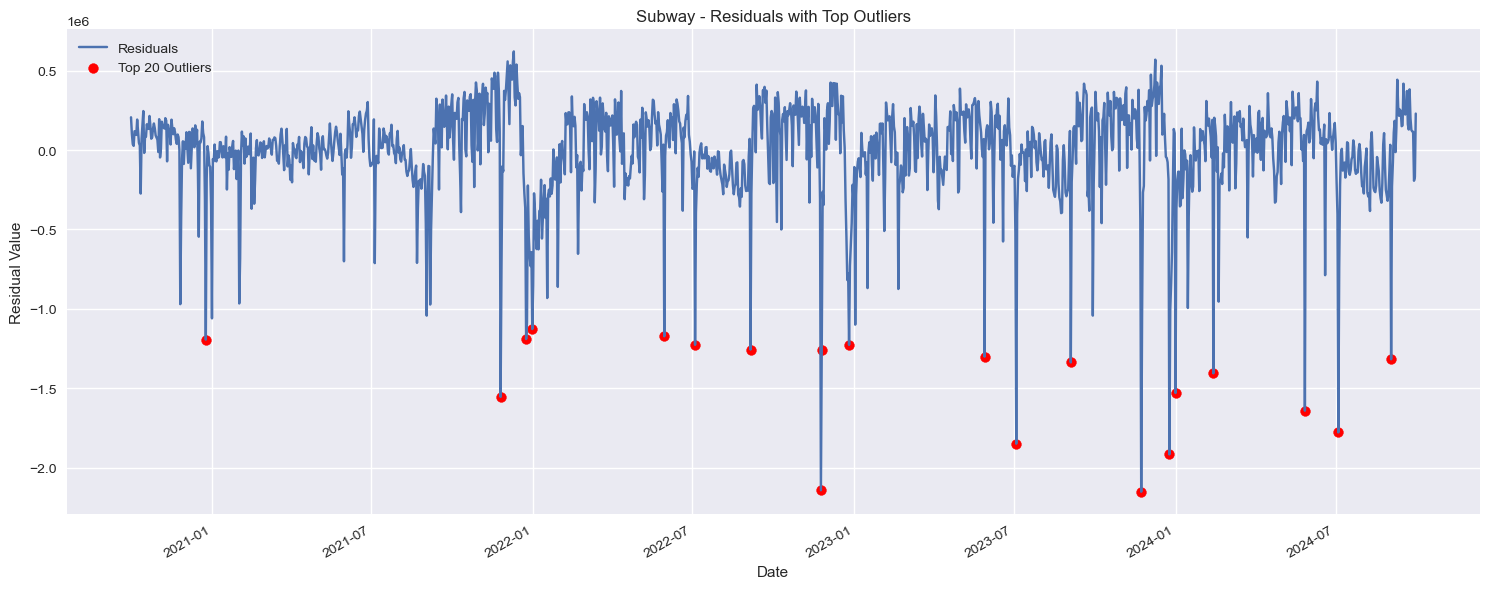


Subway - Dates of the 20 largest outliers:
Date: 2021-12-31 00:00:00, Residual: -1126851.93
Date: 2022-05-30 00:00:00, Residual: -1172463.83
Date: 2021-12-24 00:00:00, Residual: -1189761.34
Date: 2020-12-25 00:00:00, Residual: -1193466.91
Date: 2022-12-26 00:00:00, Residual: -1226258.94
Date: 2022-07-04 00:00:00, Residual: -1226285.42
Date: 2022-11-25 00:00:00, Residual: -1255617.63
Date: 2022-09-05 00:00:00, Residual: -1255781.52
Date: 2023-05-29 00:00:00, Residual: -1300645.21
Date: 2024-09-02 00:00:00, Residual: -1317088.70
Date: 2023-09-04 00:00:00, Residual: -1336731.91
Date: 2024-02-13 00:00:00, Residual: -1405483.38
Date: 2024-01-01 00:00:00, Residual: -1529346.77
Date: 2021-11-25 00:00:00, Residual: -1553867.38
Date: 2024-05-27 00:00:00, Residual: -1640512.94
Date: 2024-07-04 00:00:00, Residual: -1777434.56
Date: 2023-07-04 00:00:00, Residual: -1848320.87
Date: 2023-12-25 00:00:00, Residual: -1915645.57
Date: 2022-11-24 00:00:00, Residual: -2141359.36
Date: 2023-11-23 00:00:00

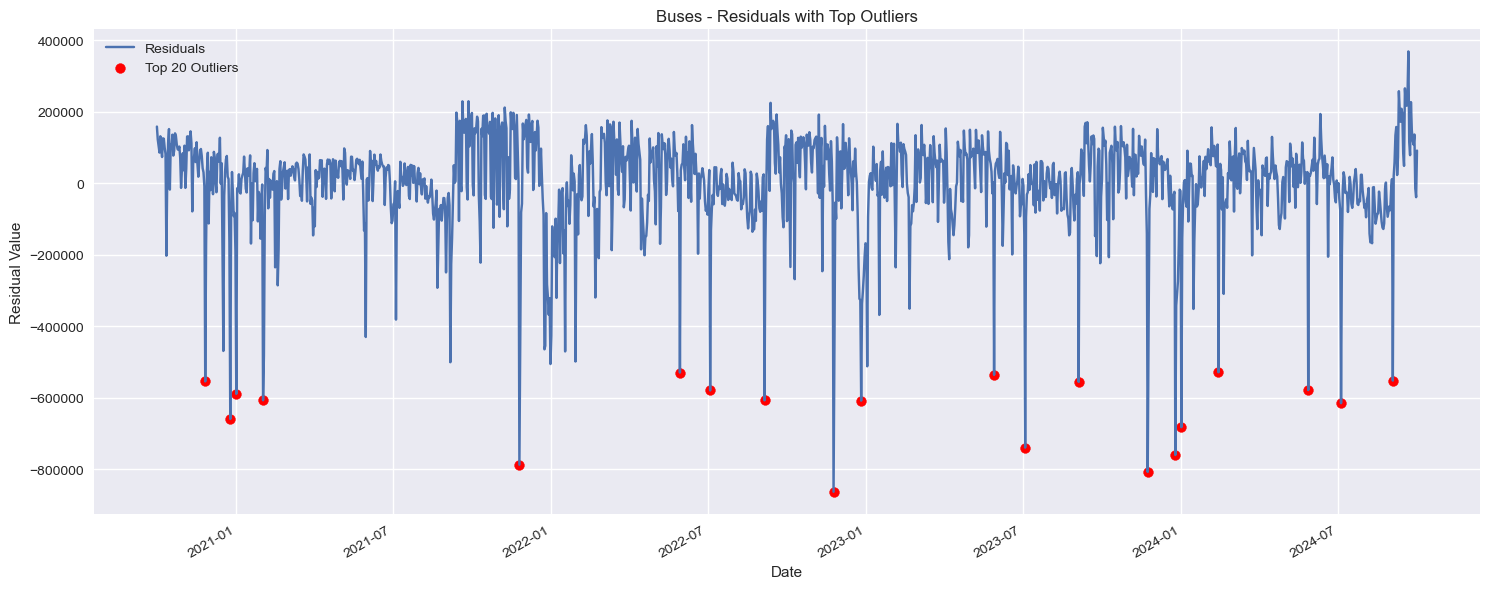


Buses - Dates of the 20 largest outliers:
Date: 2024-02-13 00:00:00, Residual: -529380.53
Date: 2022-05-30 00:00:00, Residual: -530182.21
Date: 2023-05-29 00:00:00, Residual: -536642.65
Date: 2024-09-02 00:00:00, Residual: -552650.02
Date: 2020-11-26 00:00:00, Residual: -554863.12
Date: 2023-09-04 00:00:00, Residual: -556377.56
Date: 2024-05-27 00:00:00, Residual: -579292.26
Date: 2022-07-04 00:00:00, Residual: -580220.70
Date: 2021-01-01 00:00:00, Residual: -589724.62
Date: 2021-02-01 00:00:00, Residual: -607654.96
Date: 2022-09-05 00:00:00, Residual: -607880.09
Date: 2022-12-26 00:00:00, Residual: -608766.98
Date: 2024-07-04 00:00:00, Residual: -615845.19
Date: 2020-12-25 00:00:00, Residual: -660069.72
Date: 2024-01-01 00:00:00, Residual: -682934.28
Date: 2023-07-04 00:00:00, Residual: -740163.11
Date: 2023-12-25 00:00:00, Residual: -760825.35
Date: 2021-11-25 00:00:00, Residual: -787850.22
Date: 2023-11-23 00:00:00, Residual: -808029.10
Date: 2022-11-24 00:00:00, Residual: -863568.

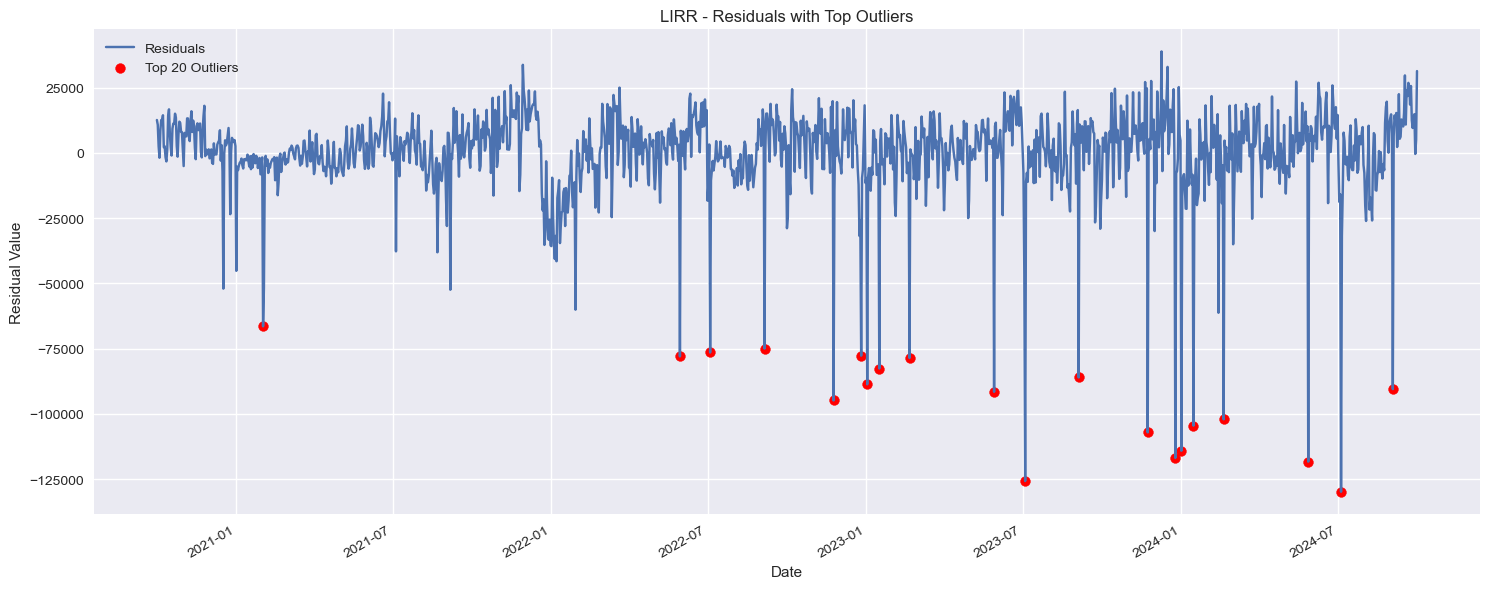


LIRR - Dates of the 20 largest outliers:
Date: 2021-02-01 00:00:00, Residual: -66439.28
Date: 2022-09-05 00:00:00, Residual: -74966.87
Date: 2022-07-04 00:00:00, Residual: -76470.99
Date: 2022-12-26 00:00:00, Residual: -77702.33
Date: 2022-05-30 00:00:00, Residual: -77968.86
Date: 2023-02-20 00:00:00, Residual: -78589.60
Date: 2023-01-16 00:00:00, Residual: -82617.54
Date: 2023-09-04 00:00:00, Residual: -86046.68
Date: 2023-01-02 00:00:00, Residual: -88664.73
Date: 2024-09-02 00:00:00, Residual: -90509.80
Date: 2023-05-29 00:00:00, Residual: -91545.11
Date: 2022-11-24 00:00:00, Residual: -94861.41
Date: 2024-02-19 00:00:00, Residual: -102093.27
Date: 2024-01-15 00:00:00, Residual: -104510.01
Date: 2023-11-23 00:00:00, Residual: -107088.03
Date: 2024-01-01 00:00:00, Residual: -114151.42
Date: 2023-12-25 00:00:00, Residual: -116902.18
Date: 2024-05-27 00:00:00, Residual: -118306.94
Date: 2023-07-04 00:00:00, Residual: -125735.87
Date: 2024-07-04 00:00:00, Residual: -129845.02


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_residuals_with_outliers(data, mode, n_outliers=20):
    # Perform STL decomposition
    stl_result = perform_stl(data)
    residuals = stl_result.resid
    dates = df_trimmed['Date']

    # Find the indices of the n largest absolute residuals
    largest_residuals_idx = np.argsort(np.abs(residuals))[-n_outliers:]

    # Ensure indices are within bounds
    valid_indices = largest_residuals_idx[largest_residuals_idx < len(dates)]

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, residuals, label='Residuals')
    plt.scatter(dates.iloc[valid_indices], residuals[valid_indices], 
                color='red', s=50, label=f'Top {len(valid_indices)} Outliers')

    # Customize the plot
    plt.title(f'{mode} - Residuals with Top Outliers')
    plt.xlabel('Date')
    plt.ylabel('Residual Value')
    plt.legend()

    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()

    # Use tight layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the dates of the outliers
    print(f"\n{mode} - Dates of the {len(valid_indices)} largest outliers:")
    for idx in valid_indices:
        print(f"Date: {dates.iloc[idx]}, Residual: {residuals[idx]:.2f}")

# Plot residuals with outliers for each mode
for mode, data in zip(modes, data_list):
    plot_residuals_with_outliers(data, mode)



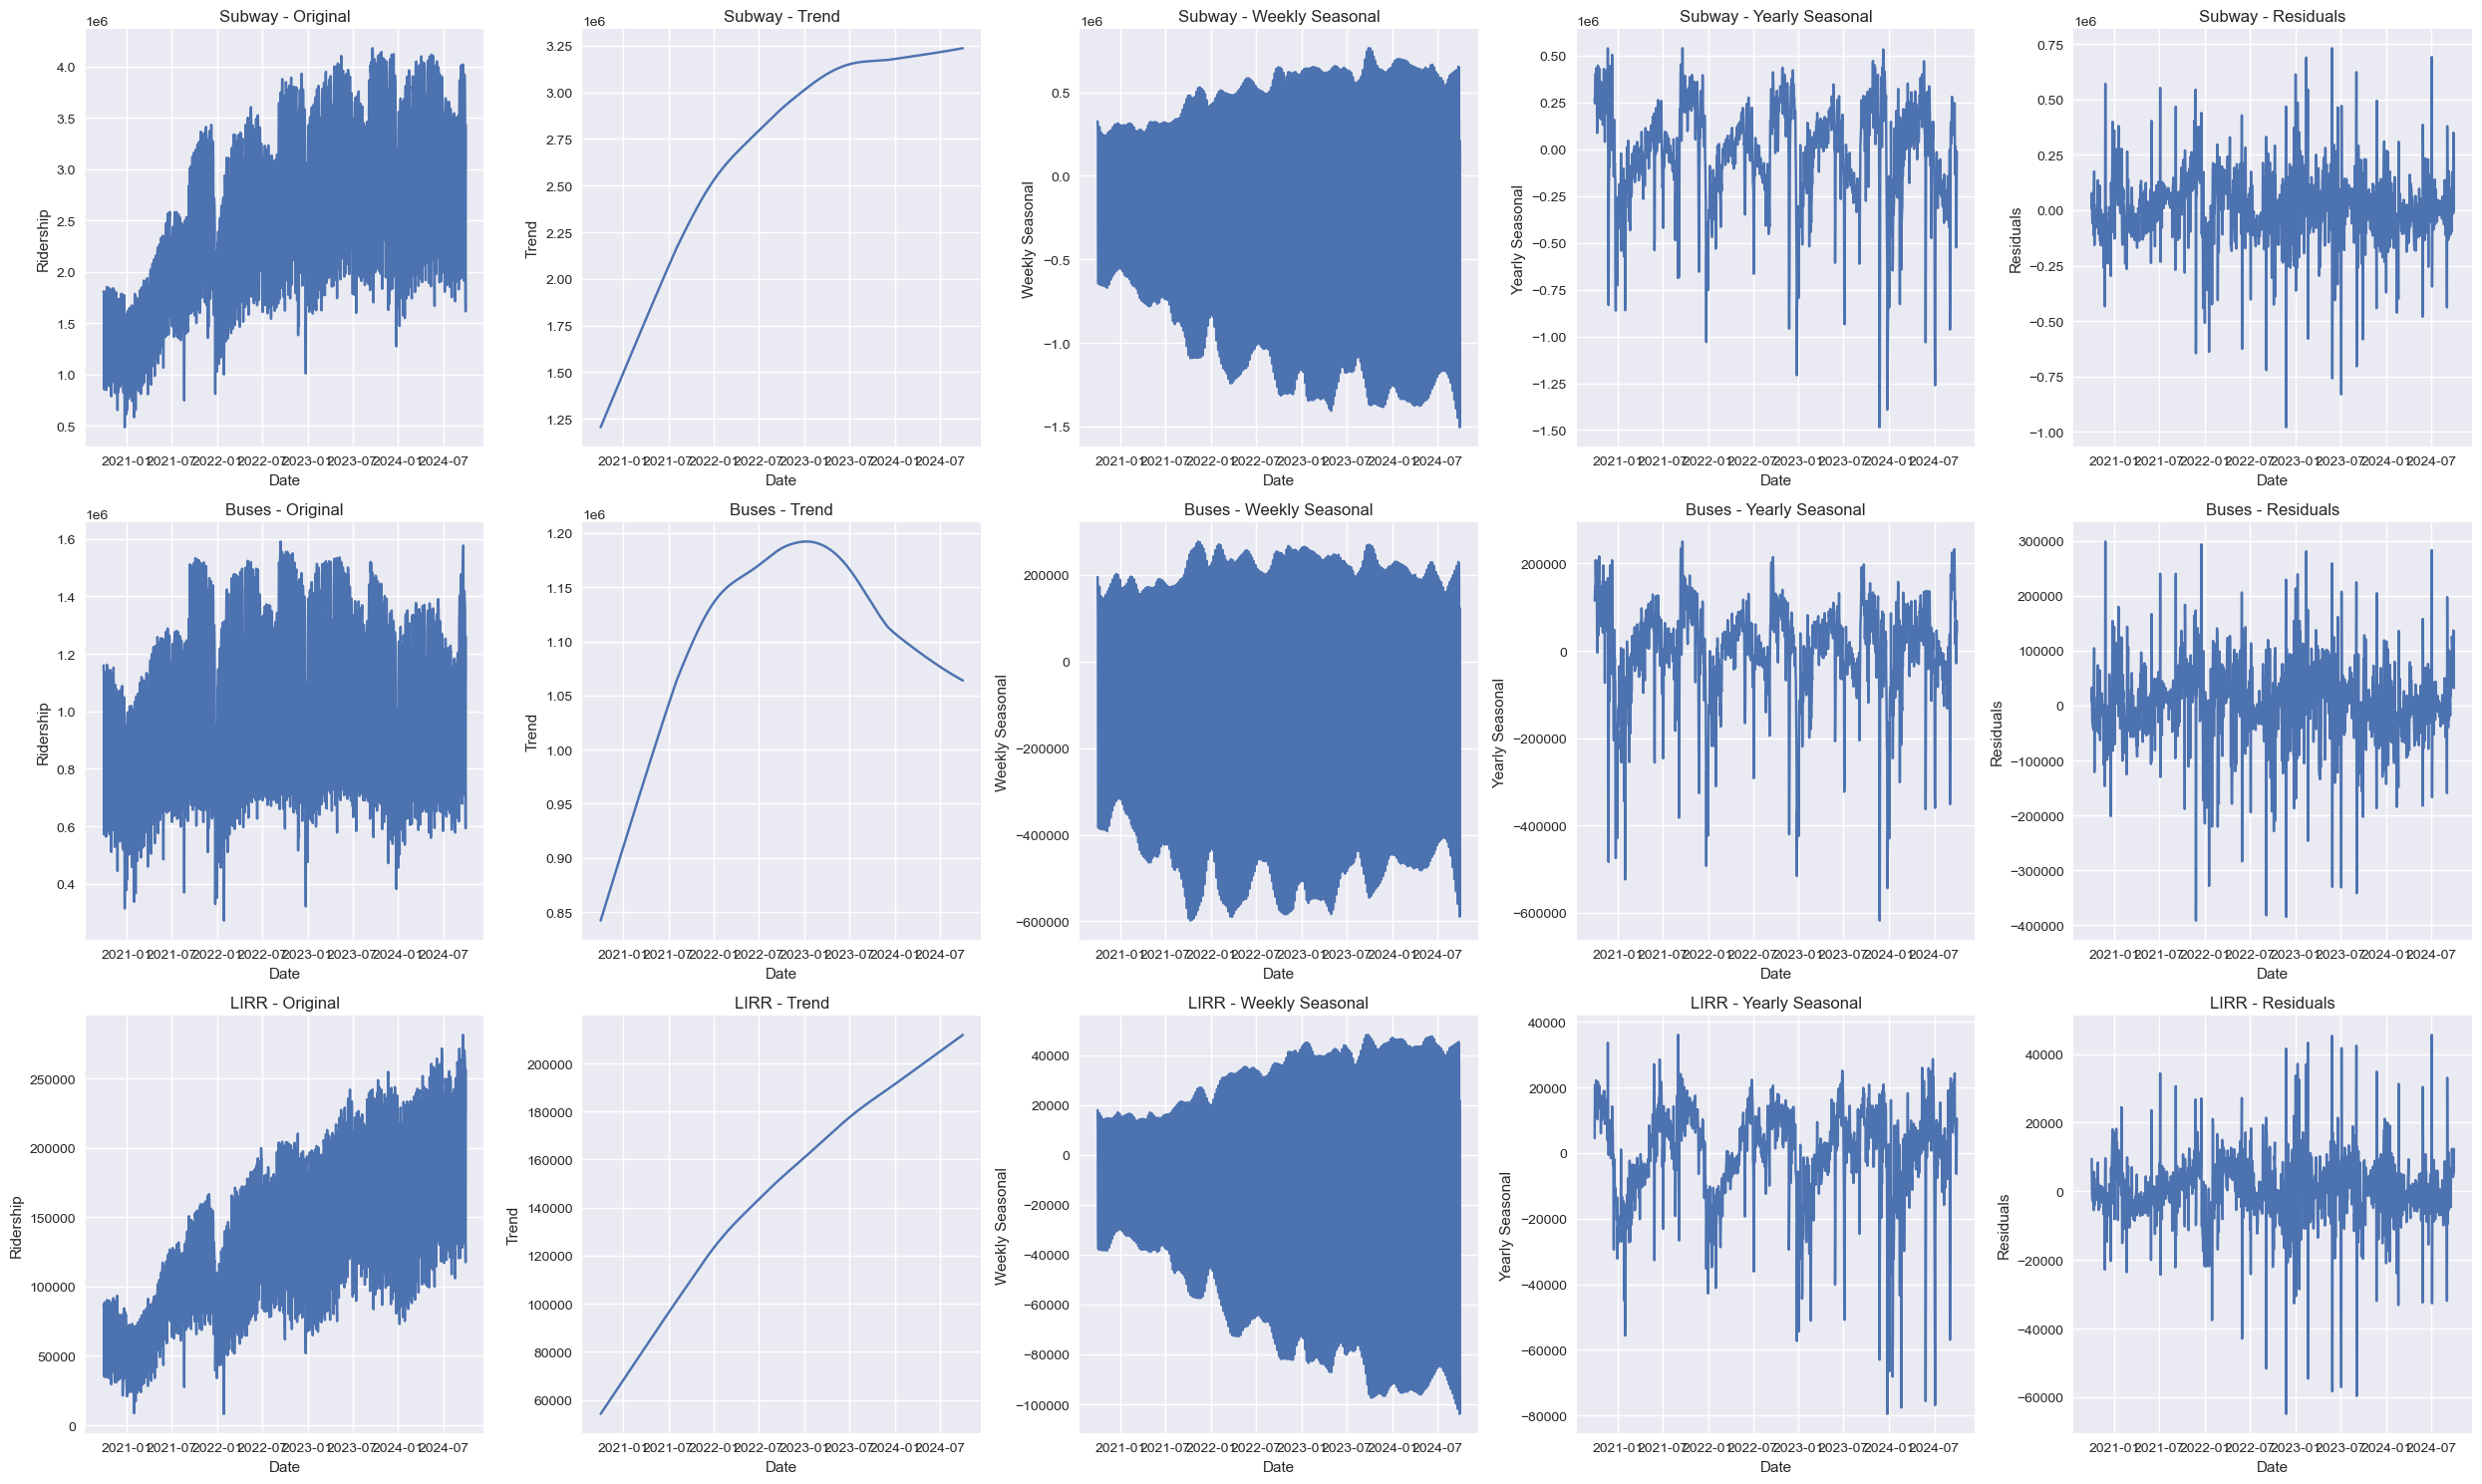


Subway MSTL Decomposition:
Trend strength: 0.9379
Weekly seasonality strength: 0.9423
Yearly seasonality strength: 0.7573

Buses MSTL Decomposition:
Trend strength: 0.6327
Weekly seasonality strength: 0.9356
Yearly seasonality strength: 0.7177

LIRR MSTL Decomposition:
Trend strength: 0.9584
Weekly seasonality strength: 0.9529
Yearly seasonality strength: 0.7058


In [24]:
from statsmodels.tsa.seasonal import MSTL

def perform_mstl(data, periods=[7, 365]):
    mstl = MSTL(data, periods=periods).fit()
    return mstl

# Create a new figure for plotting MSTL decomposition
fig, axs = plt.subplots(3, 5, figsize=(25, 15))

for i, (mode, data) in enumerate(zip(modes, data_list)):
    mstl_result = perform_mstl(data)
    
    # Plot original data
    axs[i, 0].plot(df_trimmed['Date'], data)
    axs[i, 0].set_title(f'{mode} - Original')
    axs[i, 0].set_xlabel('Date')
    axs[i, 0].set_ylabel('Ridership')
    
    # Plot trend component
    axs[i, 1].plot(df_trimmed['Date'], mstl_result.trend)
    axs[i, 1].set_title(f'{mode} - Trend')
    axs[i, 1].set_xlabel('Date')
    axs[i, 1].set_ylabel('Trend')
    
    # Plot weekly seasonal component
    axs[i, 2].plot(df_trimmed['Date'], mstl_result.seasonal[:, 0])
    axs[i, 2].set_title(f'{mode} - Weekly Seasonal')
    axs[i, 2].set_xlabel('Date')
    axs[i, 2].set_ylabel('Weekly Seasonal')
    
    # Plot yearly seasonal component
    axs[i, 3].plot(df_trimmed['Date'], mstl_result.seasonal[:, 1])
    axs[i, 3].set_title(f'{mode} - Yearly Seasonal')
    axs[i, 3].set_xlabel('Date')
    axs[i, 3].set_ylabel('Yearly Seasonal')
    
    # Plot residual component
    axs[i, 4].plot(df_trimmed['Date'], mstl_result.resid)
    axs[i, 4].set_title(f'{mode} - Residuals')
    axs[i, 4].set_xlabel('Date')
    axs[i, 4].set_ylabel('Residuals')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print some statistics about the decomposition
for mode, data in zip(modes, data_list):
    mstl_result = perform_mstl(data)
    print(f"\n{mode} MSTL Decomposition:")
    print(f"Trend strength: {1 - np.var(mstl_result.resid) / np.var(mstl_result.trend + mstl_result.resid):.4f}")
    print(f"Weekly seasonality strength: {1 - np.var(mstl_result.resid) / np.var(mstl_result.seasonal[:, 0] + mstl_result.resid):.4f}")
    print(f"Yearly seasonality strength: {1 - np.var(mstl_result.resid) / np.var(mstl_result.seasonal[:, 1] + mstl_result.resid):.4f}")

/var/folders/vz/n6q5ty6n0g10lysg2fb_28sr0000gn/T/ipykernel_46252/3810716306.py:16: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(lags, acf_values, use_line_collection=True)


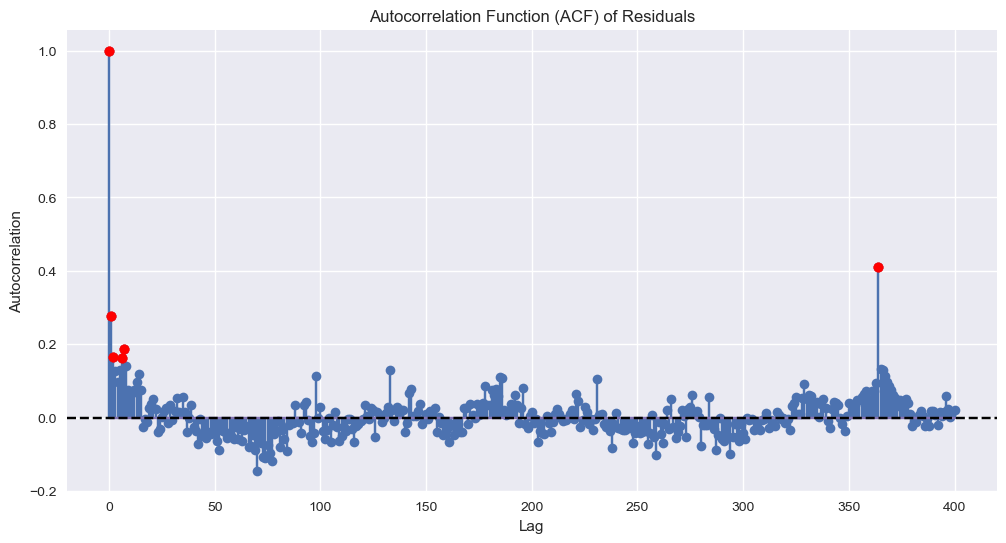

Number of significant lags: 6
Significant lags: [  0   1   2   6   7 364]


In [25]:
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np

# Compute autocorrelation values and confidence intervals
acf_values, confint = acf(stl_result.resid, nlags=400, alpha=0.05)

# Generate lag numbers
lags = np.arange(len(acf_values))

# Find lags where autocorrelation amplitude is larger than 0.15
significant_lags = lags[np.abs(acf_values) > 0.15]

# Plot the autocorrelation function with significant lags highlighted
plt.figure(figsize=(12, 6))
plt.stem(lags, acf_values, use_line_collection=True)
plt.scatter(significant_lags, acf_values[significant_lags], color='red', zorder=5)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

print(f"Number of significant lags: {len(significant_lags)}")
print(f"Significant lags: {significant_lags}")


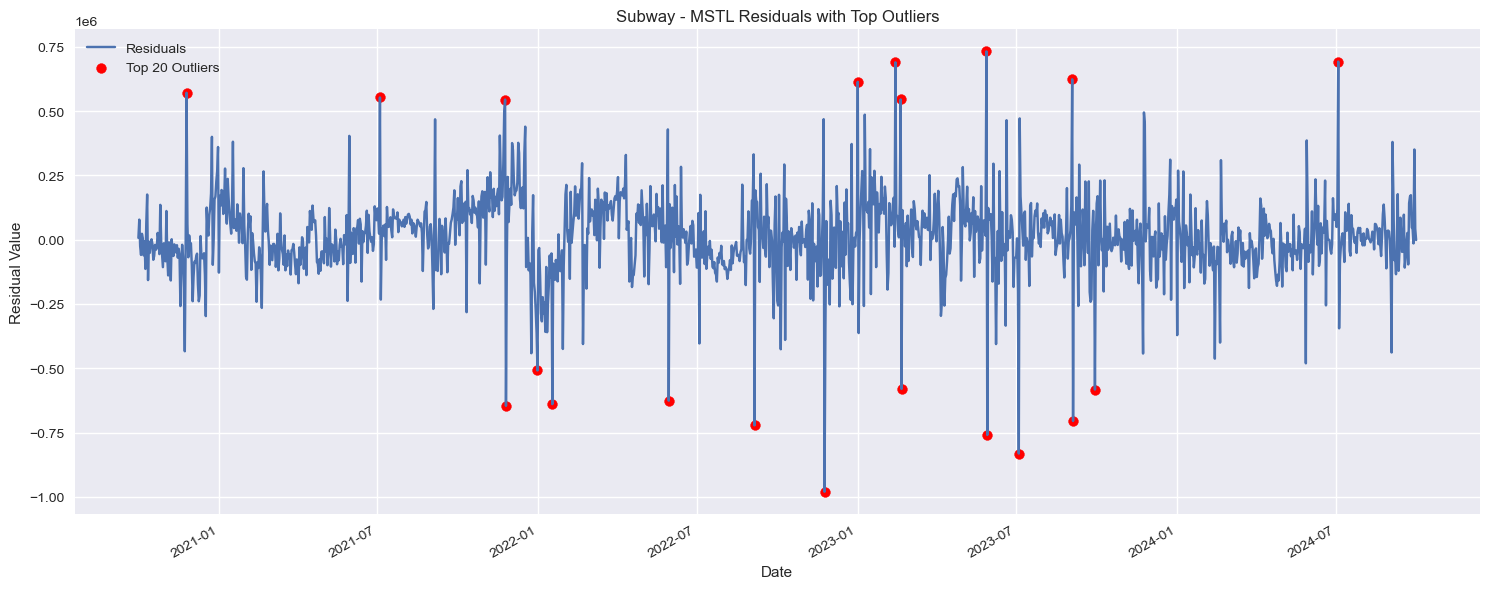


Subway - Dates of the 20 largest MSTL residual outliers:
Date: 2021-12-31 00:00:00, Residual: -508670.07
Date: 2021-11-24 00:00:00, Residual: 545011.51
Date: 2023-02-19 00:00:00, Residual: 545324.45
Date: 2021-07-04 00:00:00, Residual: 553084.06
Date: 2020-11-25 00:00:00, Residual: 571252.37
Date: 2023-02-20 00:00:00, Residual: -580464.30
Date: 2023-09-29 00:00:00, Residual: -582875.57
Date: 2023-01-01 00:00:00, Residual: 613761.26
Date: 2023-09-03 00:00:00, Residual: 623804.78
Date: 2022-05-30 00:00:00, Residual: -626199.06
Date: 2022-01-17 00:00:00, Residual: -639528.23
Date: 2021-11-25 00:00:00, Residual: -646127.82
Date: 2023-02-13 00:00:00, Residual: 689872.03
Date: 2024-07-03 00:00:00, Residual: 692492.00
Date: 2023-09-04 00:00:00, Residual: -705144.48
Date: 2022-09-05 00:00:00, Residual: -722061.91
Date: 2023-05-28 00:00:00, Residual: 732157.58
Date: 2023-05-29 00:00:00, Residual: -759542.49
Date: 2023-07-04 00:00:00, Residual: -831829.24
Date: 2022-11-24 00:00:00, Residual: -9

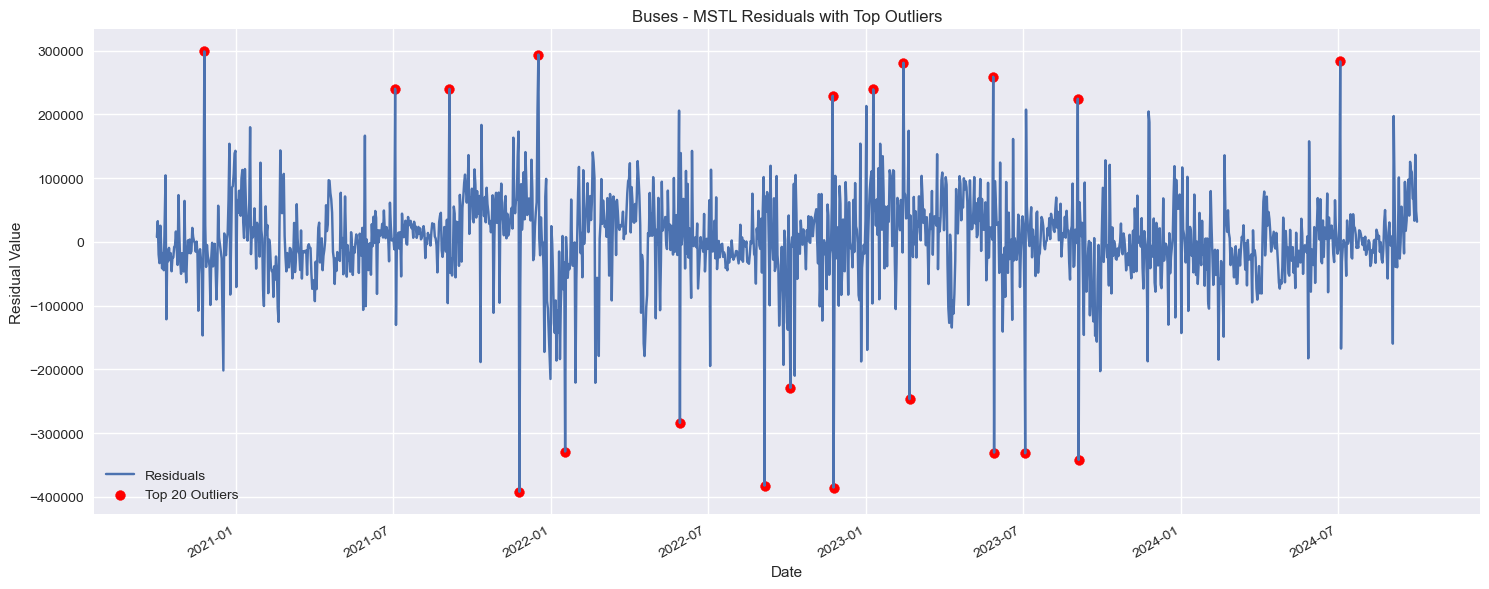


Buses - Dates of the 20 largest MSTL residual outliers:
Date: 2023-09-03 00:00:00, Residual: 224682.13
Date: 2022-10-05 00:00:00, Residual: -228910.30
Date: 2022-11-23 00:00:00, Residual: 229324.17
Date: 2023-01-09 00:00:00, Residual: 239438.57
Date: 2021-09-05 00:00:00, Residual: 240194.67
Date: 2021-07-04 00:00:00, Residual: 240297.57
Date: 2023-02-20 00:00:00, Residual: -246500.66
Date: 2023-05-28 00:00:00, Residual: 259236.24
Date: 2023-02-13 00:00:00, Residual: 281166.59
Date: 2024-07-03 00:00:00, Residual: 283216.05
Date: 2022-05-30 00:00:00, Residual: -283959.22
Date: 2021-12-17 00:00:00, Residual: 293933.34
Date: 2020-11-25 00:00:00, Residual: 298934.63
Date: 2022-01-17 00:00:00, Residual: -328669.75
Date: 2023-05-29 00:00:00, Residual: -330386.73
Date: 2023-07-04 00:00:00, Residual: -331426.35
Date: 2023-09-04 00:00:00, Residual: -341915.09
Date: 2022-09-05 00:00:00, Residual: -382159.66
Date: 2022-11-24 00:00:00, Residual: -385235.47
Date: 2021-11-25 00:00:00, Residual: -391

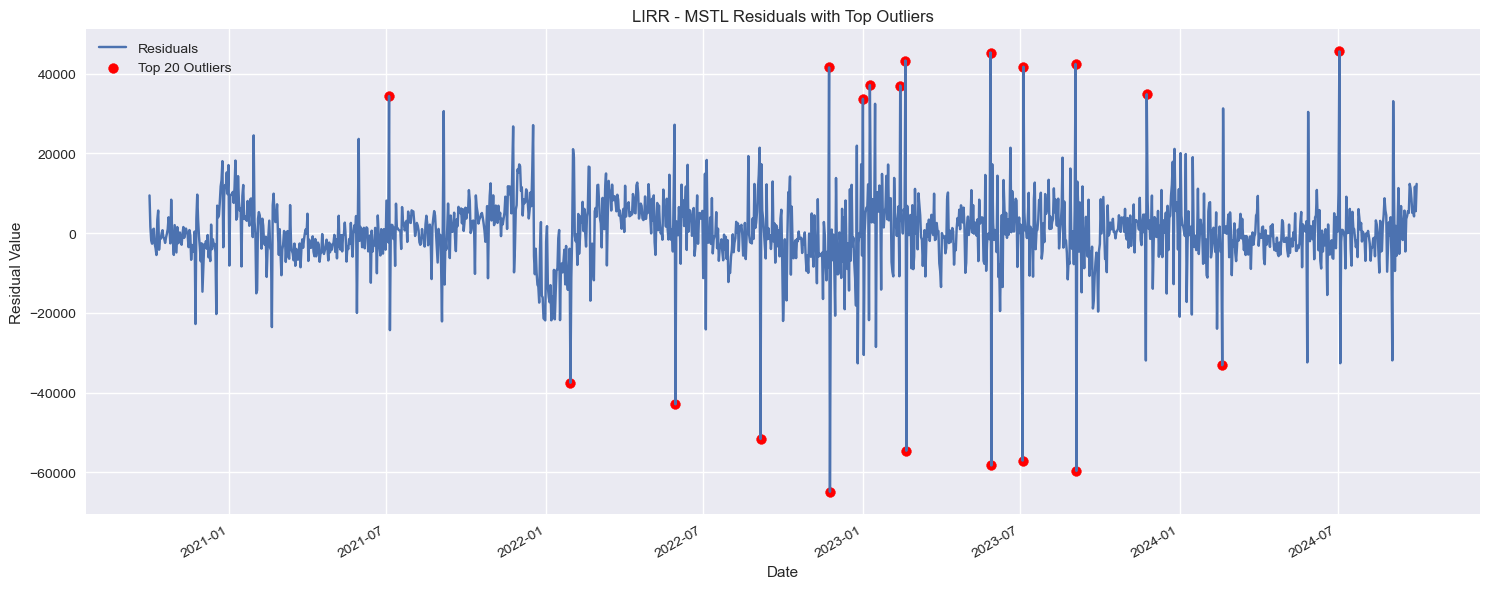


LIRR - Dates of the 20 largest MSTL residual outliers:
Date: 2024-02-19 00:00:00, Residual: -33137.59
Date: 2023-01-01 00:00:00, Residual: 33728.53
Date: 2021-07-04 00:00:00, Residual: 34397.12
Date: 2023-11-24 00:00:00, Residual: 34867.71
Date: 2023-02-13 00:00:00, Residual: 37047.05
Date: 2023-01-09 00:00:00, Residual: 37154.18
Date: 2022-01-29 00:00:00, Residual: -37554.64
Date: 2022-11-23 00:00:00, Residual: 41599.72
Date: 2023-07-05 00:00:00, Residual: 41762.58
Date: 2023-09-03 00:00:00, Residual: 42456.56
Date: 2022-05-30 00:00:00, Residual: -42945.89
Date: 2023-02-19 00:00:00, Residual: 43315.59
Date: 2023-05-28 00:00:00, Residual: 45331.76
Date: 2024-07-03 00:00:00, Residual: 45603.15
Date: 2022-09-05 00:00:00, Residual: -51639.86
Date: 2023-02-20 00:00:00, Residual: -54595.71
Date: 2023-07-04 00:00:00, Residual: -57071.95
Date: 2023-05-29 00:00:00, Residual: -58294.53
Date: 2023-09-04 00:00:00, Residual: -59662.35
Date: 2022-11-24 00:00:00, Residual: -64884.58


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import MSTL

def plot_mstl_residuals_with_outliers(data, mode, n_outliers=20):
    # Perform MSTL decomposition
    mstl_result = perform_mstl(data)
    residuals = mstl_result.resid
    dates = df_trimmed['Date']

    # Find the indices of the n largest absolute residuals
    largest_residuals_idx = np.argsort(np.abs(residuals))[-n_outliers:]

    # Ensure indices are within bounds
    valid_indices = largest_residuals_idx[largest_residuals_idx < len(dates)]

    # Create the plot
    plt.figure(figsize=(15, 6))
    plt.plot(dates, residuals, label='Residuals')
    plt.scatter(dates.iloc[valid_indices], residuals[valid_indices], 
                color='red', s=50, label=f'Top {len(valid_indices)} Outliers')

    # Customize the plot
    plt.title(f'{mode} - MSTL Residuals with Top Outliers')
    plt.xlabel('Date')
    plt.ylabel('Residual Value')
    plt.legend()

    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()

    # Use tight layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print the dates of the outliers
    print(f"\n{mode} - Dates of the {len(valid_indices)} largest MSTL residual outliers:")
    for idx in valid_indices:
        print(f"Date: {dates.iloc[idx]}, Residual: {residuals[idx]:.2f}")

# Plot MSTL residuals with outliers for each mode
for mode, data in zip(modes, data_list):
    plot_mstl_residuals_with_outliers(data, mode)

In [29]:
import pandas as pd
import os

def save_combined_residuals_to_csv(modes, data_list):
    combined_residuals = pd.DataFrame()
    
    for mode, data in zip(modes, data_list):
        # Perform MSTL decomposition
        mstl_result = perform_mstl(data)
        residuals = mstl_result.resid
        dates = df_trimmed['Date']
        
        # Create a DataFrame with dates and residuals for this mode
        mode_residuals = pd.DataFrame({
            'Date': dates,
            f'{mode} Residual': residuals
        })
        
        # Merge with the combined DataFrame
        if combined_residuals.empty:
            combined_residuals = mode_residuals
        else:
            combined_residuals = pd.merge(combined_residuals, mode_residuals, on='Date', how='outer')

    # Save to CSV
    filename = os.path.join('..', 'assets', 'combined_daily_ridership_residuals.csv')
    combined_residuals.to_csv(filename, index=False)
    print(f"Combined residuals saved to {filename}")

# Save combined residuals for all modes
save_combined_residuals_to_csv(modes, data_list)


Combined residuals saved to ../assets/combined_daily_ridership_residuals.csv
